# Исследование аудитории приложения «Ненужные вещи» 

В приложении «Ненужные вещи» пользователи продают свои ненужные вещи, размещая их на доске объявлений.
Необходимо провести исследование аудитории сервиса по логам пользовательских событий в приложении, совершенных после 07.10.2019.

**Цель исследования** - на основе сегментации пользователей (заданной и выделенной самостоятельно) получить гипотезы о том как можно было бы улучшить приложение с точки зрения клиентского опыта. Заданная сегментация пользователей - по источникам скачивания приложения.

**Задачи исследования:**
1. Выделить сегменты пользователей для создния второй пары тестируемых групп.
2. Исследовать, какие пользователи склонны чаще возвращаться в мобильное приложение.
2. Исследовать, какие пользователи чаще совершают целевое событие (конверсия в целевое действие).
3. Определить, как различается время между распространенными событиями пользователей из разных групп.
4. Подготовить презентацию с результатами исследования. 

**Источник данных** - 2 датасета: один с действиями пользователей в приложении, второй с данными об источниках скачивания приложения.

**Навыки и инструменты** - python, pandas, numpy, math, datetime, scipy.stats, matplotlib, seaborn, plotly.express,  событийная аналитика, продуктовые метрики, проверка статистических гипотез. 
____

# Резюме

Обобщая полученные данные, можно с достаточной степенью уверенности сказать, что:
1. Пользователи группы google и пользователи с короткими сессиями чаще возвращаются в приложение.
2. Среди пар сравниваемых групп конверсия находится примерно на одном уровне: среди групп yandex и google конверсия равна 25,28% против 24,11%, а среди групп с короткими и длинными сессиями - 17,97% против 16,55%, соответственно. Разница составляет 0,17% между группами по источникам и 1,42% между группами по длительности сессий.
3. Среди пользователей групп google и yandex время, проводимое в приложении, практически не отличается: 10:12 против 10:43, а среди групп с короткими и длительными сессиями разница в 14,4 раза: 1:28 минут против 18:45 минут соответственно.
1. Несмотря на численное превосходство группы yandex и её незначительно более высокую конверсию, обе группы (google и yandex) приносят приложению пользователей одинакового качества.
2. Несмотря на достаточно интенсивную активность пользователей с короткими сессиями и незначительно более высокую конверсию среди них, пользователи с длинными сессиями значимо не отличаются от них, то есть для приложения пользователи обоих групп качественно идентичны.

Для повышения конверсии в целевое действие среди пользователей группы yandex необходимо улучшить их удержание, а для группы google стоит сосредоточиться на возможности повышения активности пользователей.

Для увеличения конверсии среди групп с короткими сессиями необходимо улучшить их удержание и сосредоточиться на возможности повышения активности пользователей, а для улучшения конверссии среди пользователей с длинными сессиями
необходимо повышать их удержание.

**Презентация**

https://disk.yandex.ru/i/3z6VxbSu-YTFLQ

**Дашборд**

https://public.tableau.com/app/profile/anna3994/viz/Nenuzhnye_veshi_manuilova_2/Dashboard1?publish=yes

____

# Краткое содержание работы

**В 1-ом разделе выполнялось первичное изучение данных.** 
Здесь было произведено ознакомление с данными методом `info`, а также проводилось сравнение уникальных пользователей между датасетами методом `nunique`. В данные были выявлены аспекты, требующие исправления на следующем этапе.

**Во 2-м разделе проводилась предобработка данных.**

На этом шаге наименование столбцов обоих датасетов было приведено к единому стилю написания методом `rename`, проверены и устранены смысловые дубликаты методом `value_counts` (в отношении действий пользователей), столбец с датами событий приведен к соответсвующему формату при помощи `to_datetime`.

**В 3-м разделе проводился исследовательсктй анализ данных.**

На этом этапе исходные датасеты о событиях и логах сессий были объединены в один общий `df` для удобства работы. Затем, опираясь на  результаты независимого [исследования](https://traff.ink/articles/trendy-mobilnyh-prilozhenij-2021-2022/#timesess), которые можно принять за стандарт, были выделены сессии пользователей и сформирован датасет для поиска аномалий - `df_20`.

При проверке данных на выбросы было проанализировано 3 параметра: пользователи, сессии и даты событий. В каждом из них были обнаружены выбросы, совокупный объем которых составил 37,5%.

С учетом ограниченности исходных данных и невозможности получения доп.информации, было принято решение очистить датасет только по показателю средней продолжительности одной сессии, так как этот параметр использовался для сегментации пользователей на группы.

После очистки датасета от выбросов пользователи были распределены на группы:
 - по медианному показателю средней продолжительности одной сессии `df_duration`: короткие (А) и длинные (В),
 - по источникам скачивания приложения `df_source`: google и yandex.

**В 4-ом разделе проводился непосредственно анализ данных.**

В данном разделе были проанализированы все группы пользователей по таким метрикам как: 
- удержание, 
- время, проведенное в приложение,
- частота действий,
- конверсия в целевое действие - просмотр контактов.

**В 5-ом резделе проводилось тестирование гипотез.**

На основе проведенного анализа и выдвинутых ранее предположений были сформулированы следующие гипотезы:

1. Гипотезы для групп, разделенных по признаку источника скачивания приложения:
    - Нулевая гипотеза: Группа пользователей, установившая приложение по ссылке из yandex, и группа пользователей, установившая приложение поссылке из - google, демонстрируют одинаковую конверсию в просмотры контактов.
    - Альтернативная гипотеза: Группа пользователей, установившая приложение по ссылке из yandex, и группа пользователей, установившая приложение поссылке из - google, демонстрируют разную конверсию в просмотры контактов.
    
2. Гипотезы для групп, разделенных по признаку средней продолжительности одной сессии:
     - Нулевая гипотеза: Пользователи группы с короткими сессиями и пользователи с длинными сессиями демонстрируют одинаковую конверсию в целевое действие.
     - Альтернативная гипотеза: Пользователи группы с короткими сессиями демонстрируют более высокую конверсию в целевое действие, чем пользователи с длинными сессиями.

Для тестирования гипотез был проведен z-тест сравнения конверсий в целевое действие по долям и в обоих случаях был получен отрицательный результат: нулевую гипотезу о равенстве конверсии между каждой парой групп отвергнуть нельзя.

Результаты анализа говорят о том, что в обоих случаях конверсия каждой пары групп не идентична, но разница составляет 0,17% среди групп по источникам скачивания и 1,42% среди групп по длительности сессий. Таким образом, можно сделать вывод о том, что разница в общей конверсии между группами в относительных величинах не является статистически значимой при тестировании гипотез.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-файлов-и-знакомство-с-данными" data-toc-modified-id="Загрузка-файлов-и-знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка файлов и знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-и-изучение-файлов" data-toc-modified-id="Загрузка-и-изучение-файлов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и изучение файлов</a></span><ul class="toc-item"><li><span><a href="#Загрузка-файла-mobile_dataset" data-toc-modified-id="Загрузка-файла-mobile_dataset-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Загрузка файла <code>mobile_dataset</code></a></span></li><li><span><a href="#Загрузка-файла-mobile_sources" data-toc-modified-id="Загрузка-файла-mobile_sources-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Загрузка файла <code>mobile_sources</code></a></span></li></ul></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-стиля-заголовков" data-toc-modified-id="Изменение-стиля-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение стиля заголовков</a></span></li><li><span><a href="#Изменение-форматов-столбцов" data-toc-modified-id="Изменение-форматов-столбцов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение форматов столбцов</a></span></li><li><span><a href="#Проверка-смысловых-дубликатов" data-toc-modified-id="Проверка-смысловых-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка смысловых дубликатов</a></span></li><li><span><a href="#Проверка-полных-дубликатов-строк" data-toc-modified-id="Проверка-полных-дубликатов-строк-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проверка полных дубликатов строк</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Объединение-датасетов" data-toc-modified-id="Объединение-датасетов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Объединение датасетов</a></span></li><li><span><a href="#Выделение-сессий-пользователей" data-toc-modified-id="Выделение-сессий-пользователей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выделение сессий пользователей</a></span></li><li><span><a href="#Поиск-аномальных-пользователей-по-количеству-совершенных-действий" data-toc-modified-id="Поиск-аномальных-пользователей-по-количеству-совершенных-действий-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Поиск аномальных пользователей по количеству совершенных действий</a></span></li><li><span><a href="#Поиск-аномальных-пользователей-по-количеству-совершенных-действий-за-одну-сессиию" data-toc-modified-id="Поиск-аномальных-пользователей-по-количеству-совершенных-действий-за-одну-сессиию-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Поиск аномальных пользователей по количеству совершенных действий за одну сессиию</a></span></li><li><span><a href="#Поиск-аномалий-в-длительности-сессиий" data-toc-modified-id="Поиск-аномалий-в-длительности-сессиий-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Поиск аномалий в длительности сессиий</a></span></li><li><span><a href="#Поиск-аномалий-в-датах-событий-и-количестве-событий-в-день" data-toc-modified-id="Поиск-аномалий-в-датах-событий-и-количестве-событий-в-день-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Поиск аномалий в датах событий и количестве событий в день</a></span></li><li><span><a href="#Очистка-датасета-от-выбросов" data-toc-modified-id="Очистка-датасета-от-выбросов-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Очистка датасета от выбросов</a></span></li><li><span><a href="#Выделение-групп-тестирования" data-toc-modified-id="Выделение-групп-тестирования-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Выделение групп тестирования</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Присвоение-значений-постоянным-параметрам" data-toc-modified-id="Присвоение-значений-постоянным-параметрам-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Присвоение значений постоянным параметрам</a></span></li><li><span><a href="#Анализ-удержания-групп-по-источникам-скачивания-приложения" data-toc-modified-id="Анализ-удержания-групп-по-источникам-скачивания-приложения-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ удержания групп по источникам скачивания приложения</a></span></li><li><span><a href="#Анализ-удержания-групп-по-длительности-сессии" data-toc-modified-id="Анализ-удержания-групп-по-длительности-сессии-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализ удержания групп по длительности сессии</a></span></li><li><span><a href="#Анализ-времени,-проведенного-пользователями-в-приложении" data-toc-modified-id="Анализ-времени,-проведенного-пользователями-в-приложении-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ времени, проведенного пользователями в приложении</a></span></li><li><span><a href="#Анализ-частоты-действий-пользователей" data-toc-modified-id="Анализ-частоты-действий-пользователей-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ частоты действий пользователей</a></span></li><li><span><a href="#Анализ-конверсии-в-целевое-действие" data-toc-modified-id="Анализ-конверсии-в-целевое-действие-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ конверсии в целевое действие</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Статистический-анализ-данных" data-toc-modified-id="Статистический-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Статистический анализ данных</a></span><ul class="toc-item"><li><span><a href="#Формулирование-гипотез" data-toc-modified-id="Формулирование-гипотез-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Формулирование гипотез</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Заключение</a></span></li></ul></div>

## Загрузка файлов и знакомство с данными

### Импорт библиотек

Импортирую библиотеки, котрые мне понадобятся для проведения исследования, и настраиваю отображение датасетов

In [1]:
import pandas as pd
import math
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
import plotly.express as px

from datetime import date, datetime, timedelta

# параметрвы отображения датасетов и графиков
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sns.set_theme(style="whitegrid", palette="muted")

### Загрузка и изучение файлов

#### Загрузка файла `mobile_dataset` 

Загружаю файл с данными о событиях и сохраняю его в переменную `df_events`. 

In [2]:
df_events.info()
df_events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Сразу видно, что пропущенных значений нет, <font color="browm">данные с типом даты в формате object и в названии столбцов нужно точку заменить на underscore </font> 

#### Загрузка файла `mobile_sources` 

Загружаю файл с данными об источниках скачивания и сохраняю его в переменную `df_sourсes`. 

In [3]:
df_sourсes.info()
df_sourсes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


Здесь пропущенных значений нет, <font color="browm">нужно скорректировать название столбца userId</font>.

Датасет с событиями логично имеет гораздо большее количество строк, чем датасет с данными о скачивании приложения, но в обоих файлах есть ID пользователей. Проверим, по всем ли пользователям, загрузившим приложение, у нас есть информация о том, как они им пользовались. Не найденных пользователей нужно будет сразу удалить, так как иначе они исказят результаты исследования.

Сначала проверяю общее количесство:

In [4]:
if df_events['user.id'].nunique() == df_sourсes['userId'].nunique():
    print('Общее количество уникальных пользователей в df_events и df_sourсes совпадает')
else:
    print('Общее количество уникальных пользователей в df_events и df_sourсes **не** совпадает')

Общее количество уникальных пользователей в df_events и df_sourсes совпадает


Теперь сравниваю значения двух столбцов:

In [5]:
# получим Series уникальных пользователей df_events и df_sourсes
uniq_users_1 = df_events.groupby('user.id')['user.id'].unique()
uniq_users_2 = df_sourсes.groupby('userId')['userId'].unique()
    
# сравним полученные Series для поиска одинаковых пользователей
inter = pd.Series(np.intersect1d(uniq_users_1, uniq_users_2)) #
    
# выведем результат сравнения    
if len(inter):
    print('{} и {} имеют {} пересекающихся пользователей'.format('df_events', 'df_sourсes', len(inter)))
else:
    print('{} и {} не имеют пересекающихся пользователей'.format('df_events', 'df_sourсes'))

df_events и df_sourсes имеют 4293 пересекающихся пользователей


### Вывод по разделу

В исходных файдах отсутствут пропуски/пустые значения, а уникальные пользователи в обоих датасетах идентичны.

Требуется исправить:
1. данные с типом даты привести к нужному формату
2. изменить названия столбцов в обоих датасетах

## Предобработка данных

### Изменение стиля заголовков

Сначала приведу наименование столбцов во всех датасетах к единому стилю:

In [6]:
df_events.rename({'event.time': 'event_time', 'event.name': 'event_name', 'user.id': 'user_id'}, inplace=True, axis=1)
df_events.columns

Index(['event_time', 'event_name', 'user_id'], dtype='object')

In [7]:
df_sourсes.rename({'userId':'user_id'}, inplace=True, axis=1)
df_sourсes.columns

Index(['user_id', 'source'], dtype='object')

### Изменение форматов столбцов

Сведения о датах событий привожу к формату даты:

In [8]:
df_events['event_time'] = pd.to_datetime(df_events['event_time'])
df_events['dt'] = df_events['event_time'].dt.date
df_events.head()

,event_time,event_name,user_id,dt
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07


In [9]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   dt          74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.3+ MB


### Проверка смысловых дубликатов

Сначала проверяю смысловые дубликаты в источниках скачивания приложения:

In [10]:
df_sourсes['source'].value_counts()

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

По источникам смысловых дубликатов не обнаружено. Проверяю второй датасет, в нём смысловые дубликаты могут быть только в названии событий:

In [11]:
df_events['event_name'].value_counts().sort_index()

advert_open       6164
contacts_call      541
contacts_show     4450
favorites_add     1417
map               3881
photos_show      10012
search_1          3506
search_2           324
search_3           522
search_4           701
search_5          1049
search_6           460
search_7           222
show_contacts       79
tips_click         814
tips_show        40055
Name: event_name, dtype: int64

Есть 2 варианта написания одно действия: просмотр контактов записан как `contacts_show` и`show_contacts`. Последнего варианта написания меньшинство, поэтому заменю его на `contacts_show`:

In [12]:
df_events['event_name'].replace('show_contacts', 'contacts_show', inplace=True)
# проверяю изменения
df_events['event_name'].value_counts().sort_index()

advert_open       6164
contacts_call      541
contacts_show     4529
favorites_add     1417
map               3881
photos_show      10012
search_1          3506
search_2           324
search_3           522
search_4           701
search_5          1049
search_6           460
search_7           222
tips_click         814
tips_show        40055
Name: event_name, dtype: int64

Данные заменились корректно, могу двигаться дальше.

### Проверка полных дубликатов строк

Проверим датасеты на дубликаты:

In [13]:
df_events.duplicated().sum()

0

In [14]:
df_sourсes.duplicated().sum()

0

### Вывод по разделу

Наименование столбцов обоих датасетов было приведено к единому стилю написания, проверены и устранеы смысловые дубликаты (в отношении действий пользователей), столбец с датами событий приведен к соответсвующему формату.

## Исследовательский анализ данных

### Объединение датасетов

Датасеты отличаются только сведениями об источнике скачивания приложения, которые нужн ыбудут для проверки гипотезы. Соответственно, нужно объедтинить датасеты в один и работать далее с ним:

In [15]:
df = df_events.merge(df_sourсes, on='user_id', how='left')
df.head()

,event_time,event_name,user_id,dt,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,yandex


### Выделение сессий пользователей

В исследовании компании **Adjust** о трендах мобильных приложений 2021-2022 в разделе [Средняя продолжительность сессии](https://traff.ink/articles/trendy-mobilnyh-prilozhenij-2021-2022/#timesess) приводятся данные о длительности сессий в 2019 года на маркетплейсах и досках объявлений - этот показатель составил порядка 11 минут.

Так как в исходных данных нет точных сведений о длительности сессий пользователей (нет даты и времени окончания сессии), а для дальнейшего исследования они нужны, то для проверки корректности выделенных сессий я буду опираться на исследование Adjust. То есть мне нужно перебором времени тайм-аута и последующего расчета средней продолжительности сессии прийти к значению, наиболее близкому к 11 минутам.

Для выделения сессий пользователей установлю порог продолжительности 30 минут, затем рассчитаю общее среднее значение длительности сессии (без группировки по пользователям):

In [16]:
# задаю эталонную длительность сессии
session_standart_time = pd.Timedelta(11, 'm')

# создаю функцию для выделения сессий и определения их средней продолжительности
def split_sessions(data, timeout):
    """Эта функция выделяет сессии пользователей и считает общую среднюю продолжительность одной сессии.

    В функцию подается рабочий датасет и желаемое значение тайм-аута. 
    Сначала выполняется выделение сессий пользователей, затем происходит расчет длительности каждой сессии по всем 
    пользователям и расчет средней продолжительности сессии в приложении в целом.
    
    Функция возвращает 2 новых датафрейма: первый - копия поданного на вход, но с добавленной колонкой session_id,
    второй - датасет, сгруппированный по пользователям и сессиям с указанием их длительности.
    """
    
    new_data = data.sort_values(['user_id', 'event_time'], ignore_index=True)
    g = (new_data.groupby('user_id')['event_time'].diff() > pd.Timedelta(timeout)).cumsum()
    new_data['session_id'] = new_data.groupby(['user_id', g], sort=False).ngroup() + 1

    grouped = new_data.groupby(['user_id', 'session_id'])

    delta = (grouped['event_time'].max() - grouped['event_time'].min()).to_frame().reset_index()
    delta.rename(columns={'event_time':'session_duration'}, inplace=True)
    session_duration_mean = delta['session_duration'].mean()
    
    print('Средняя длительность сессии составила {}'.format(session_duration_mean))
    return new_data, delta

In [17]:
# выделяю сессии пользователей с тайм-аутом в 30 минут
df_timeout_30, sessions_30 = split_sessions(df, '30min')
display(df_timeout_30.head())
sessions_30.head()

Средняя длительность сессии составила 0 days 00:12:52.672627050


,event_time,event_name,user_id,dt,source,session_id
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1


,user_id,session_id,session_duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:09:55.727258
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,0 days 00:08:27.385985
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,0 days 00:14:59.272096
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,0 days 00:12:38.171767
4,00157779-810c-4498-9e05-a1e9e3cedf93,5,0 days 00:25:20.787329


Длительность сессии составила пости 13 минут, точнее 12:52 мин. В абсолютных значениях показатель кажется достаточно близким, но всё-таки параметр длительности сессии достаточно чувствительнй, поэтому полученное значение не подойдет. Рассчитают среднюю продолжительность для 25 и 20 минут:

In [18]:
# выделяю сессии пользователей с тайм-аутом в 30 минут
df_timeout_25, sessions_25 = split_sessions(df, '25min')

Средняя длительность сессии составила 0 days 00:11:52.574882615


In [19]:
# выделяю сессии пользователей с тайм-аутом в 30 минут
df_timeout_20, sessions_20 = split_sessions(df, '20min')

Средняя длительность сессии составила 0 days 00:10:48.680013362


Средняя продолжительность сессии при тайм-ауте в 20 минут, равная 10:48, наиболее близка к эталонному значению в 11 минут. Объединяю полученные датасеты по уникальным пользователям и их сессиям в датасет `df_timeout_20`, который будет использоваться дальнейшего исследования.

In [20]:
df_20 = df_timeout_20.merge(sessions_20, on=['user_id', 'session_id'], how='left')
df_20.head(10)

,event_time,event_name,user_id,dt,source,session_id,session_duration
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258
5,2019-10-07 13:45:43.212340,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258
6,2019-10-07 13:46:31.033718,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258
7,2019-10-07 13:47:32.860234,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258
8,2019-10-07 13:49:41.716617,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258
9,2019-10-09 18:33:55.577963,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,other,2,0 days 00:08:27.385985


### Поиск аномальных пользователей по количеству совершенных действий

In [21]:
# задаю параметры графиков для данного раздела
plt.rcParams["figure.figsize"] = [15, 10]

Нужно проверить выборку на наличие пользователей с нетипично большим количеством совершаемых действий. Для начала посчитаю количество действий в приложении на одного пользователя за всё время:

In [22]:
df_cnt = (df.pivot_table(index='user_id', values='event_name', aggfunc='count')
         .reset_index()
         .rename(columns={'event_name':'events_count'}))
df_cnt.head()

,user_id,events_count
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,35
1,00157779-810c-4498-9e05-a1e9e3cedf93,71
2,00463033-5717-4bf1-91b4-09183923b9df,10
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,32
4,00551e79-152e-4441-9cf7-565d7eb04090,8


Количество действий по пользователям определено, теперь можно посмотреть описание распределения полученных значений:

In [23]:
df_cnt['events_count'].describe()

count   4293.00000
mean      17.28325
std       29.13068
min        1.00000
25%        5.00000
50%        9.00000
75%       17.00000
max      478.00000
Name: events_count, dtype: float64

Итак, минимальное количество действий у одного пользователя - 1, среднее - 17, медиана - 9, Q3 - 17, а максимум - 478. По этим данным  максимум явно является выбросом. Визуализирую распределение количества действий по пользовтаелям гистограммой и шагом в 10 действий на одного пользователя:

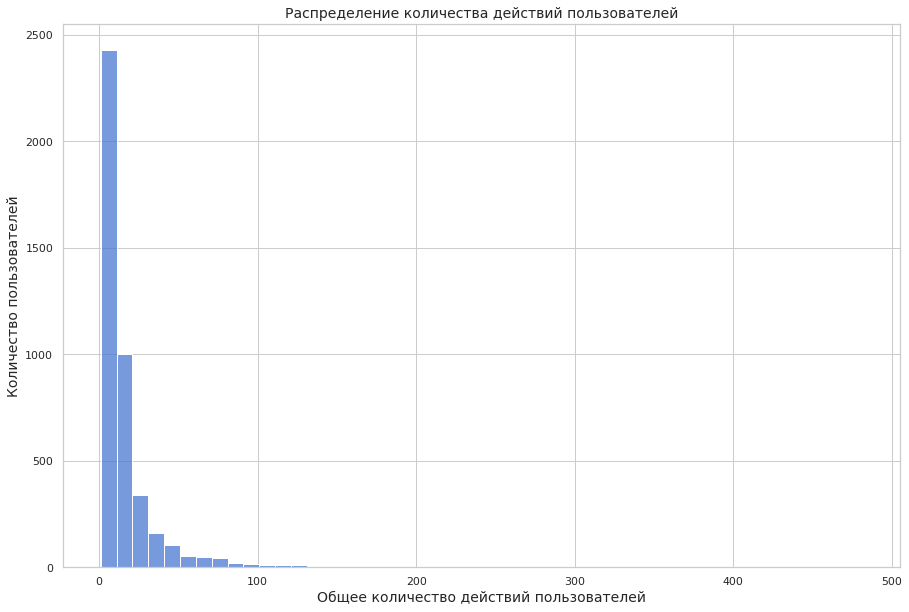

In [24]:
sns.histplot(df_cnt['events_count'], binwidth = 10)
plt.title('Распределение количества действий пользователей', size=14)
plt.xlabel('Общее количество действий пользователей', size=14)
plt.ylabel('Количество пользователей', size=14)

plt.show()

Наиболее часто встречающийся в выборке результат - до 10 действий на одного пользолвателя, таких пользователей почти 2500 человек из ~4300. В отношении остальных пользователей харакетерно распределение количества совершаемых ими действий в диапазоне от 10 до 80, а вот в диапазоне 80 - 500 значений уже очень мало и они похожи на аномалии. Для проверки порога выбросов рассчитываю 95-99 перцентили:

In [25]:
percentiles_list = [95, 96, 97, 98, 99]

def calc_percentiles(data, group_col, col, percentiles):
    return pd.Series(np.percentile(data.groupby(group_col)[col].count(), percentiles), index=percentiles)

users_cnt_action_perc = calc_percentiles(df, 'user_id', 'user_id', percentiles_list)

99-й перцентиль равен 132-м действиям на одного пользователя. Проверяю выборку на нормальность распределения по правилу 3-х сигм: считаю стандартное отклонение, увеличенное на 3 и для сравнения его с 99-м перцентилем.

In [26]:
(df_20.groupby('user_id')['user_id'].count().std())*3

87.39203176647672

Пороговое значение трехкратного стандартного отклонения равно 87, что меньше 132, значит, выборка имеет нормальное распределение. Ближайший к полученному значению перцентиль - 98-й, равный 95 действиям одного пользователя. Если его использовать, то будет отсечено 2% выборки. Для принятия решения об объеме удаляемых выбросов, снова визуализирую распределение, но уже с ограничением по 99-му перцентилю:

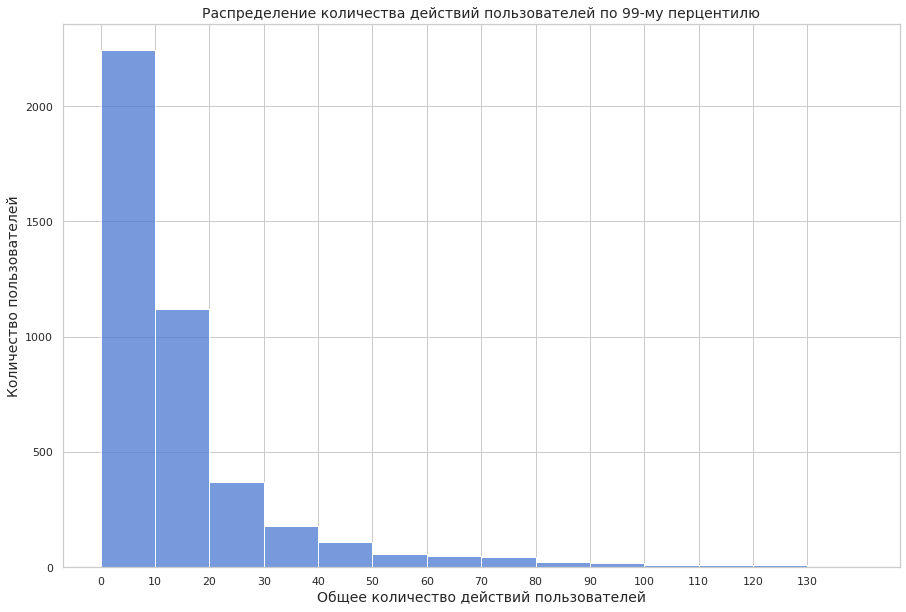

In [27]:
sns.histplot(df_cnt['events_count'], binrange=(0, users_cnt_action_perc[99]), binwidth = 10)
plt.title('Распределение количества действий пользователей по 99-му перцентилю', size=14)
plt.xlabel('Общее количество действий пользователей', size=14)
plt.ylabel('Количество пользователей', size=14)
plt.xticks(ticks=range(0,140,10))

plt.show()

99-й перцентиль равен 95-ти действиям, но на графике видно, что начиная с отметки в 90 действий плотность распределения сохраняется на одном уровне и меняется только около значения в 100 действий: она становится меньше и чем ближе к 132, тем больше она продолжает снижаться. 

Значит, отсекать выборку от аномальных значений по 98-му перцентилю будет слишком грубым решением, а по 99-му - слишком завышенным (по пороговому значению). Поэтому для очистки датасета выбран порог в 100 действий, это уменьшит датасет чуть менее, чем на 2%. Определяю точное количество аномальных пользователей:

In [28]:
def calc_abnormal_cnt(data, col, limit, name, is_time=False):
    '''Эта функция считает количество аномалий по исследуемому признаку.
    
    В функцию подается датасет, название колонки, по значениям которой будет происходить сравнение, пороговое 
    значение для сравнения и название сравниваемого показателя.
    
    Функция возвращает строку с текстом о количестве аномальных значений по исследуемому признаку.
    '''
    
    series = data[col]
    
    if is_time == True:
        series = series.astype('timedelta64[m]')
    cnt_abnormal = len(data[series > limit])
    return('Количество аномальных {} составляет {}'.format(name, cnt_abnormal))

limit_action = 100
calc_abnormal_cnt(df_cnt, 'events_count', limit_action, 'пользователей')

'Количество аномальных пользователей составляет 76'

Теперь проверяю долю событий, приходящихся на этих пользователей:

In [29]:
def calc_abnormal_percent(data_1, data_2, col_1, col_2, limit, name, is_time=False):
    '''Эта функция считает долю аномалий по исследуемому признаку.
    
    В функцию  дважды подается один датасет: первый раз для формирования списика аномальных значений, а второй для 
    подсчета количества строк с аномальными значениями. Далее указывается название колонок, по значениям которых будет
    происходить сравнение и срез соответственно, пороговое значение для сравнения и название сравниваемого показателя.
    
    Функция возвращает строку с текстом о доле аномальных значений по исследуемому признаку.
    '''
    
    series = data_1[col_1]
    
    if is_time == True:
        series = series.astype('timedelta64[m]')
    list_abnormal = data_1[series > limit][col_2].tolist()
    row_abnormal = len(data_2[data_2[col_2].isin(list_abnormal)])
    return('Доля аномальных {} в выборке составляет {:.2%}'.format(name, row_abnormal/len(data_2)))

calc_abnormal_percent(df_cnt, df_20, 'events_count', 'user_id', limit_action, 'пользователей')

'Доля аномальных пользователей в выборке составляет 18.27%'

Доля больше 15%! Учитывая, что анализируется поведение пользователей, а один пользователь генерирует большое количество событий, выбросы по этому показателю решено не удалять.

### Поиск аномальных пользователей по количеству совершенных действий за одну сессиию

Проверю, есть ли слишком активные пользователи в выборке, если рассматривать их действия сквозь призму сессий:

In [30]:
df_session_cnt = (df_20.pivot_table(index=['user_id', 'session_id'], values='event_name', aggfunc='count')
                 .reset_index()
                 .rename(columns={'event_name':'count'}))
df_session_cnt.head()

,user_id,session_id,count
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,9
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,4
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,14
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,8
4,00157779-810c-4498-9e05-a1e9e3cedf93,5,9


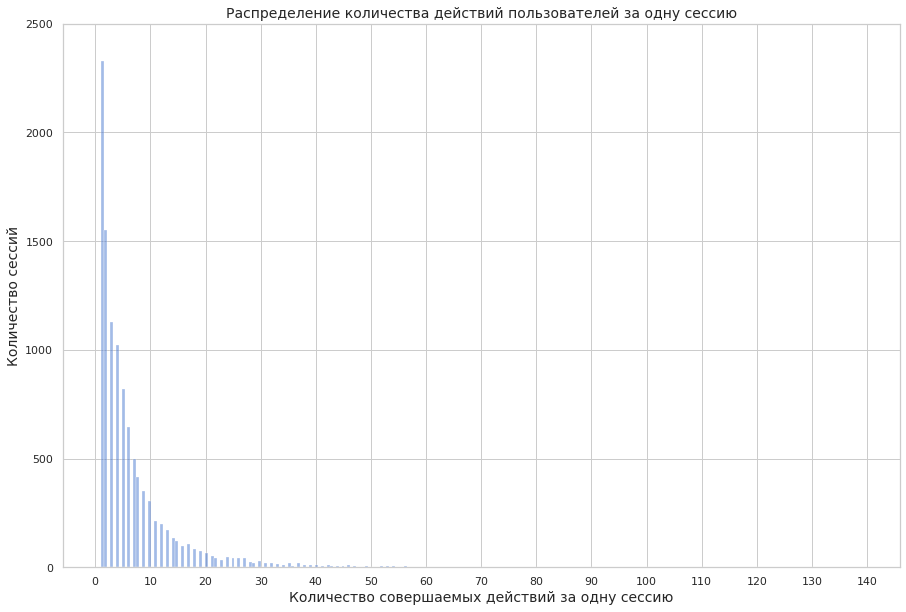

In [31]:
sns.histplot(df_session_cnt['count'], alpha=0.5,)
plt.title('Распределение количества действий пользователей за одну сессию', size=14)
plt.xlabel('Количество совершаемых действий за одну сессию', size=14)
plt.ylabel('Количество сессий', size=14)
plt.xticks(ticks=range(0,150,10))
plt.ylim([0,2500])

plt.show()

Диапазон размаха количества действий за одну сессиию на пользователя составляет от 1 до 140 ед. Минимальное количество действий равно 1 ед. и этот показатель характерен примерно для 2400 посещений приложения, 2-а действия приходятся примерно на 1600, 3-и - на 1200 и 4-е на 1000 сессий. 

То есть совокупно среди наиболее значительных показателей количества совершаемых действий за одну сессию стоит отметить посещения, в которых пользователь совершает от 1 до 4-х дейтсивий: на них совокупно приходится порядка 6200 сессий из почти 11000, то есть чуть больше половины всей выборки.

График демонстрирует достаточно плавное сокращение числа сессий с большим количеством совершаемых действий. Достаточно однородное распределение проиходит до отметки в ~58 сесси1, а после него начинаются периодические значения. Необходимо проверить описание показателя, трехкратное стандартное отклонение и перцентили:

In [32]:
df_20.groupby('session_id')['event_name'].count().describe()

count   10975.00000
mean        6.76055
std         8.96245
min         1.00000
25%         2.00000
50%         4.00000
75%         8.00000
max       139.00000
Name: event_name, dtype: float64

Медиана - 4 действия за одну сессию, среднее - 6 ед., а Q3 - 8 ед., при этом максимуму - 139 ед.

In [33]:
(df_20.groupby('session_id')['event_name'].count()).std()*3

26.887358692367126

In [34]:
# считаю перцентили
users_se_cnt_action_perc = calc_percentiles(df_timeout_20, 'session_id', 'event_name', percentiles_list)
users_se_cnt_action_perc

95   23.00000
96   25.00000
97   28.00000
98   33.00000
99   44.00000
dtype: float64

Трехкратное стандартное отклонение равно почти 27 действиям, а 99-й перцентиль - 44-м действиям, значит выборка имеет нормальное распределение. Ближайший к трехкратному стандартному отклонению перцентиль - 97-й, равный 28 действиям, но он ведет к потере почти 3-х процентов выборки. Проверю количсетво аномальных пользователей по перцентилям:

In [35]:
for p, v in users_se_cnt_action_perc.iteritems():
    print('Для перцентиля {} {}'.format(p, calc_abnormal_cnt(df_session_cnt, 'count', v, 'пользователей')))

Для перцентиля 95 Количество аномальных пользователей составляет 520
Для перцентиля 96 Количество аномальных пользователей составляет 430
Для перцентиля 97 Количество аномальных пользователей составляет 321
Для перцентиля 98 Количество аномальных пользователей составляет 217
Для перцентиля 99 Количество аномальных пользователей составляет 105


Теперь проверю долю строк датасета, приходящихся на аномальных пользователей:

In [36]:
for p, v in users_se_cnt_action_perc.iteritems():
    print('Для перцентиля {} {}'.format(p, calc_abnormal_percent(df_session_cnt, df_20, 'count', 
                                                                 'session_id', v, 'пользователей')))

Для перцентиля 95 Доля аномальных пользователей в выборке составляет 25.93%
Для перцентиля 96 Доля аномальных пользователей в выборке составляет 22.96%
Для перцентиля 97 Доля аномальных пользователей в выборке составляет 19.02%
Для перцентиля 98 Доля аномальных пользователей в выборке составляет 14.70%
Для перцентиля 99 Доля аномальных пользователей в выборке составляет 8.95%


Даже при рассмотрении действий пользователей через призму сессиий, доля выбросов крайне значительна. Аналогично с предыдущим пунктом исследования выявленные аномалии решено оставить.

### Поиск аномалий в длительности сессиий 

Поведение пользователе изучено, теперь нужно посмотреть как долго они находятся в приложении и проверить нет ли аномалий в этом показателе.

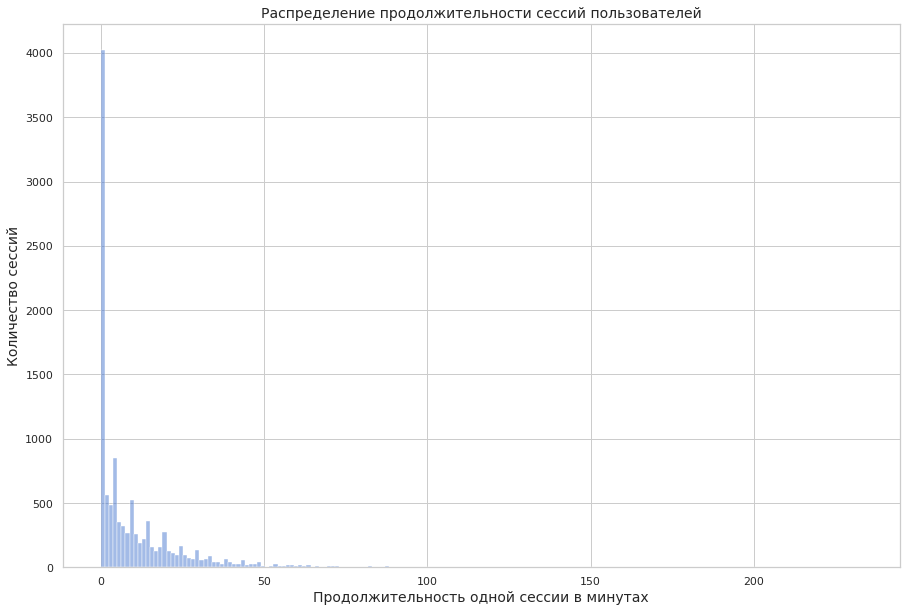

In [37]:
sns.histplot(sessions_20['session_duration'].astype('timedelta64[m]'), alpha=0.5,)
plt.title('Распределение продолжительности сессий пользователей', size=14)
plt.xlabel('Продолжительность одной сессии в минутах', size=14)
plt.ylabel('Количество сессий', size=14)

plt.show()

График мало читаем, с утром можно увидеть, что постоянная плотность событий обрывается около отметки в 120 минут. График нужно ограничить по оси Х, но для более точного определения границы сразу проверю описание:

In [38]:
sessions_20['session_duration'].describe()

count                        10975
mean     0 days 00:10:48.680013362
std      0 days 00:16:06.450581315
min                0 days 00:00:00
25%         0 days 00:00:11.937717
50%         0 days 00:04:55.340814
75%      0 days 00:14:57.538053500
max         0 days 03:53:38.911775
Name: session_duration, dtype: object

Максимальная продолжительность одной сессии - почти 4 часаа медиана всего 4:55 минут! Похоже, в выборке присутствуют выбросы. Рассчитаю трехкратное стандартное отклонение и перцентили:

In [39]:
(sessions_20['session_duration'].astype('timedelta64[m]')).std()*3

48.07309878526914

In [40]:
# считаю перцентили
session_time_perc = pd.Series(np.percentile(sessions_20['session_duration'].astype('timedelta64[m]'),
                                            percentiles_list), index=percentiles_list)

session_time_perc.astype('timedelta64[m]')

95   0 days 00:40:00
96   0 days 00:44:00
97   0 days 00:49:00
98   0 days 00:59:00
99   0 days 01:13:00
dtype: timedelta64[ns]

99-й перцентиль почти на четверть больше часа, а 98-й равен 59-ти минутам. Посчитаю количество аномально длительных сессий по всем перцентилям:

In [41]:
for p, v in session_time_perc.iteritems():
    print('Для перцентиля {} {}'.format(p, calc_abnormal_cnt(sessions_20, 'session_duration', v, 
                                                             'сессий', is_time = True)))

Для перцентиля 95 Количество аномальных сессий составляет 545
Для перцентиля 96 Количество аномальных сессий составляет 431
Для перцентиля 97 Количество аномальных сессий составляет 325
Для перцентиля 98 Количество аномальных сессий составляет 212
Для перцентиля 99 Количество аномальных сессий составляет 110


In [42]:
for p, v in session_time_perc.iteritems():
    print('Для перцентиля {} {}'.format(p, calc_abnormal_percent(sessions_20, df_20, 'session_duration', 
                                                                 'session_id', v, 'сессий', is_time = True)))

Для перцентиля 95 Доля аномальных сессий в выборке составляет 20.91%
Для перцентиля 96 Доля аномальных сессий в выборке составляет 18.17%
Для перцентиля 97 Доля аномальных сессий в выборке составляет 14.77%
Для перцентиля 98 Доля аномальных сессий в выборке составляет 10.44%
Для перцентиля 99 Доля аномальных сессий в выборке составляет 6.21%


Длительность сессиий - критичный параметр для исследования. По этому признаку не только будет рассматриваться поведение пользователей, но также по нему выборка будет разделена на 2 группы пользователей для тестирования гипотез.
Кроме того, как писалось выше, средняя продолжительность сессии - 11 минут, а 99-й перцентиль равен 73-м минутам, то в 6,6 раз превышает средний показатель за 2019 год. 

Поэтому, несмотря на превышение рекомендуемого порога при удалении данных в 5%, ренешо исключить из датасета выбросы по признаку длительности одной сессии. Визуализирую распредеоение продолжительности сессий пользователей по 99-му пецентилю, так как график по исходным данным был нечитаем:

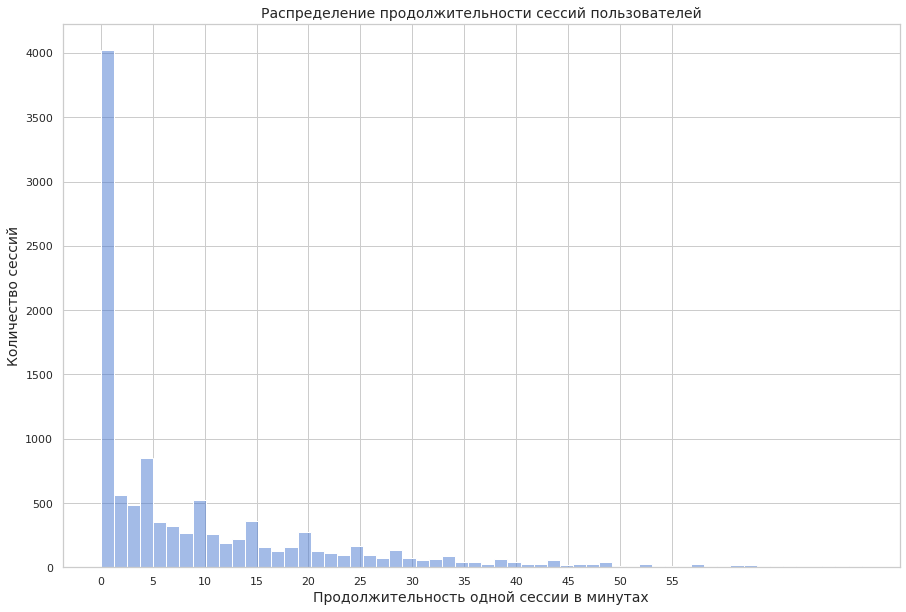

In [43]:
sns.histplot(sessions_20['session_duration'].astype('timedelta64[m]'), 
            binrange=((sessions_20['session_duration'].astype('timedelta64[m]')).min(), session_time_perc[99]), 
            alpha=0.5)
plt.title('Распределение продолжительности сессий пользователей', size=14)
plt.xlabel('Продолжительность одной сессии в минутах', size=14)
plt.ylabel('Количество сессий', size=14)
plt.xticks(ticks=range(0,60,5))

plt.show()

Максимальное количество сессий находит около нулевой отметки - вероятно, это пользователи, совершившие 1-2 действия перед тем, как покинуть приложение. Следующий пик приходится уже на отметки в 5 и 10 минут - это значения медианы и близкого к среднему.

На мой взгляд, пользователи, совершившие 1-2 действия, имеют значение, поэтому их важно оставить. Ведь это могут быть в том числе посещения, когда пользователь совершает целевое действие. Например, если товар был добавлен в избранное, чтобы через какое-то время вернуться за ним (после проверки/пополнения баланса карты, после совета/одобрения близких/друзей и т.п.).
    
Или другой вариант: пользователи часто заходят в приложения, чтобы скоротать время по каким-либо причинам, например, 2-3 минуты в очередина кассе или 5 минут в очереди на прием к врачу. В таких случаях сессии вполне могут быть частыми, но короткими, как бы рваными. Тогда пользователь может успеть просмотреть список рекомендаций или даже перейти по одному из рекомендовнных предложений, но не успеть завершить сценарий использования приложения. Варианты с ручным поиском тоже возможны, когда пользователь за сессию только вбивает запрос в поисковую строку, а с результатами знакомится уже в следующий раз.
    
Как оценить влияние таких сессий затрудняюсь ответить. Думаю, что для этого требуется id объявдений, чтобы можно было отследить их историю: если id фигурирует в нескольких сессиях, это уже подтвердит предположение. А если при этом одна из сессий содержит целевое действие, тогда полный успех.

### Поиск аномалий в датах событий и количестве событий в день

В исходных данных не указано, за какой период предоставлена выборка. Известно только, что в ней содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года. Таким образом, у меня появляется самая ранняя дата, с которой можно сравнить выборку:

In [44]:
start_dt = date(2019, 10, 7)
min_dt = df_20['dt'].min()

if min_dt == start_dt:
    print('Начальная дата предоставленных сведений, равная 07.10.2019, совпадает с минимальной датой в выборке.')
else:
    print('Начальная дата предоставленных сведений, равная 07.10.2019, не совпадает с минимальной датой в выборке, равной {}.'.format(min_dt))

Начальная дата предоставленных сведений, равная 07.10.2019, совпадает с минимальной датой в выборке.


Отправная точка в периоде анализируемых событий совпадает и это отлично! Осталось определить самую позднюю дату в выборке. Для этого считаю максимум и визуализирую распределение событий по дням с разбивкой по неделям(отмечу на графике каждй 7-й день):

In [45]:
max_dt = df_20['dt'].max()
max_dt

datetime.date(2019, 11, 3)

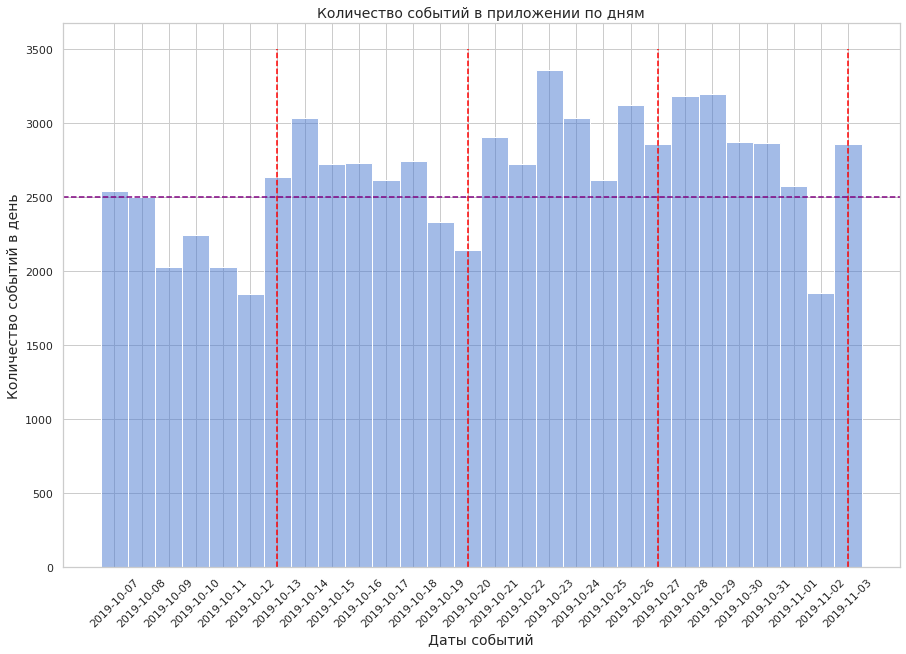

In [46]:
# создаю список дат для графика
datelist = pd.date_range(start=min_dt, end=max_dt, freq='d')
weeklist = pd.date_range(start=min_dt, end=max_dt, freq='w')

sns.histplot(data = df_20, x='dt', binwidth=27, alpha=0.5)
plt.title('Количество событий в приложении по дням', size=14)
plt.xlabel('Даты событий', size=14)
plt.ylabel('Количество событий в день', size=14)
plt.xticks(rotation=45, ticks=datelist)
plt.vlines(weeklist, 0, 3500, linestyles='dashed', color='red')
plt.axhline(y=2500, color='purple', linestyle='--')

plt.show()

На графике 4 красных линии, отложенный в каждый 7-й календарный день, значит, выборка предоставлена за месяц. Так как количество событий последнего дня выборки вполне собоставимо с другим днями выборки и не выделяется резко отличающимися значениями, можно предполагать, что выборка предоставлена за полный месяц. Даже если это не так и данные предоставлены частично, а не в полном объеме, они выглядят достаточно репрезентативно для дальнейшей работы с ними.

Минимальное количество событий в день находится примерно на уровне 1800 ед., а маскимальное - 3300 ед., основной массив количества событий в день не превышает 2500 ед.(фиолетовая отметка на графике). 

Теперь проверю описание распределения количества событий по дням и нормальность распределения выборки по правилу трех сигм:

In [47]:
df_20.groupby('dt')['event_name'].count().describe()

count     28.00000
mean    2649.89286
std      408.95036
min     1843.00000
25%     2457.00000
50%     2725.00000
75%     2884.75000
max     3361.00000
Name: event_name, dtype: float64

In [48]:
(df_20.groupby('dt')['event_name'].count().std())*3

1226.851074712742

Минимальное количество событий в день по графику было определено достаточно точно, а вот отметка среднего в 2500 ед. оказалась занидена - из описания видно, что среднее равно 2649, а медиана - 2725.

In [49]:
# считаю перцентили
dt_cnt_action_perc = calc_percentiles(df_20, 'dt', 'event_name', percentiles_list)
dt_cnt_action_perc

95   3191.80000
96   3195.04000
97   3227.35000
98   3271.90000
99   3316.45000
dtype: float64

In [50]:
# считаю перцентили
p95_dt_cnt, p96_dt_cnt, p97_dt_cnt, p98_dt_cnt, p99_dt_cnt = (np.percentile(df.groupby('dt')['event_name']
                                                                            .count(), [95, 96, 97, 98, 99]))

p95_dt_cnt, p96_dt_cnt, p97_dt_cnt, p98_dt_cnt, p99_dt_cnt

(3191.8, 3195.04, 3227.3499999999995, 3271.9, 3316.4500000000003)

Максимальное количество событий за один день равно 3361 ед., а 99-й перцентиль - 3316 ед.событий, при этом трехкратное отклонение равно 1226 ед. событий. Можно утверждать, что выборка имеет нормальное распределение.

Исходя их полученных данных предполагаемый порог отсечений выбросов будет равен 99-му перцентилю. Формирую таблицу для расчетов и проверяю количество и доляю удаляемых строк по всем перцентилям:

In [51]:
# таблица для подсчета количества событий в день
dt_piv = (df_20.pivot_table(index='dt', values='event_name', aggfunc='count')
          .reset_index()
          .rename(columns={'event_name':'count'}))

In [52]:
for p, v in dt_cnt_action_perc.iteritems():
    abnormal = len(dt_piv[dt_piv['count'] > v])
    print('Для перцентиля {} количество дат с аномальным количеством событий равно {}'.format(p, abnormal))

Для перцентиля 95 количество дат с аномальным количеством событий равно 2
Для перцентиля 96 количество дат с аномальным количеством событий равно 2
Для перцентиля 97 количество дат с аномальным количеством событий равно 1
Для перцентиля 98 количество дат с аномальным количеством событий равно 1
Для перцентиля 99 количество дат с аномальным количеством событий равно 1


In [53]:
for p, v in dt_cnt_action_perc.iteritems():
    abnormal_list = dt_piv[dt_piv['count'] > v]['dt'].tolist()
    abnornal_row = len(df_20[df_20['dt'].isin(abnormal_list)])
    print('Для перцентиля {} доля дат с аномальным количеством событий равна {:.2%}'.format(p, abnornal_row/len(df_20)))

Для перцентиля 95 доля дат с аномальным количеством событий равна 8.84%
Для перцентиля 96 доля дат с аномальным количеством событий равна 8.84%
Для перцентиля 97 доля дат с аномальным количеством событий равна 4.53%
Для перцентиля 98 доля дат с аномальным количеством событий равна 4.53%
Для перцентиля 99 доля дат с аномальным количеством событий равна 4.53%


В выборке присутсвует 28 дат, данные представлены за один полный месяц. Из 28 дат 2 содержат выбросы, но удалять их будет недальновидным решением, так как в рамках исследования требует рассчитать удержание. Исходный размер выборки, равный 1 месяцу, позволит провести 4 полноценных расчета коэффициента удержания (по 7 дней), а если очистить данные, то, во-первых, расчетов будет только 3, а во вторых будет удалено 5-9%датасета. С учетом даляемых 6% по признаку продолжительности сессиий - это слишком много.
Кроме того, возможно, проводились какие-то маркетинговые компании, которые привели к повышенной активности пользователей. Так как по условиям задачи это неизвестно и нет возможности проверить эти сведения, удалять выбросы по этому признаку будет некорректно.

### Очистка датасета от выбросов

Итак, было проанализировано 3 параметра: пользователи, сессии и даты событий. В каждом из них были обнаружены выбросы, но очищаться данные будут только по продолжительности сессий, так как этот параметр ляжет в основу разделения пользователей на группы и по нему есть результаты независимого исследования, которые можно принять за стандарт. 
Очищаю датасет:

In [54]:
# готовлю список аномальных сессий
abnormal_session_time_list = (sessions_20[sessions_20['session_duration'].astype('timedelta64[m]')>
                                         session_time_perc[99]]['session_id']).tolist()
# создаю новый датасет
df_20_fil = df_20.drop(df_20[df_20['session_id'].isin(abnormal_session_time_list)].index)

# проверяю удаление выбросов
df_20_fil.query('session_id in @abnormal_session_time_list').head()

,event_time,event_name,user_id,dt,source,session_id,session_duration


Выбросы удалены корректно, можно проводить исследование дальше.

### Выделение групп тестирования

Теперь, когда данные очищены от выбросов, можно разделить пользователей на группы. 
По условиям исследования будут тестироваться 2 гипотезы: заданная и выдвинутая самостоятельно. Для заданной гипотезы признак разделения групп предопределен - это источник скачивания приложения и он уже указан для каждого пользователя в исходных данных. 

Необходимо определить признак сегментации пользователей на группы, таким образом, чтобы выбранный метод оказался полезен для приложения и чтобы на поведени таких групп пользователей можно было влиять. Кроме того, важно получить сопоставимые по размерам группы уникальных пользователей, иначе весь последующий анализ даст заведемо искаженные результаты.

Исходя из имеющихся в распоряжении сведений, наиболее полным (охватывающим всех пользователей) выглядит признак длительности сессий. Кроме того, на этапе исследовательского анализа было выявснено, что медианная продолжительность сессии 4:55 минут, средняя - 10:48, а 99-й перцентиль - 1 час 13 минт. Разница более чем существенная!
Если половина всех пользователей из выборки, что составляет около 2100 человек, проводит в приложении менее 5 минут, то почему вторая половина пользователей проводит в нём значительно больше времени? Чем они занимаются? Как в таком случае могут отличаться основные показатели этих двух групп?

Если рассматривать показатель длительности сессии, то открывается довольно широкий спектр вопросов для тестирования гипотез:
- пользователи разных групп используют разные алгоритмы поиска (если сравнить набор действий пользователей за сессию между группами, то есть составить и сравнить портреты пользователей). Если алгоритмы поиска будут существенно отличаться, то, возможно, будет целесообразно изменить интерфес приложения или добавить возможность выбора интерфеса для повышения удобства пользователей.
- пользователи с коротки сессиями чаще пользуются рекомендациями (переходят по ним). Помимо проверки качества работы и целесообразности рекомендаций этот показатель может подсветить проблемы с поиском в случае большого или превалирующего количества длинных сессий (когда поиск выдает не релевантные запросу результаты).
- пользователи с длинными сессиями чаще добавляют объявления в избранные. Этот параметр может помочь в настройке пуш-уведомлений (просто напоминаний и/или сообщений о закрытии/снятии добавленных объявлений) и, как следствие, повлиять на конверсию и удержание. 
- пользователи с длинными сессиями чаще совершают целевое действие среди объявлений, добавленных в избранное. Здесь можно дополнить избранное группировкой товаров по категориям и платной, но не дорогой функцией сравнения объявлений по ключевым параметрам: цена, рейтинг/оценка продавца, локация продавца, возможность и стоимость доставки товара. Это повлияет на удобство использования приложения, конверсию и удержание.
- пользователи с короткими сессиями реже открывают карточку объявления (если есть функция предпросмотра товара и возможность совершения целевого действия без открытия карточки), то есть быстрее и/или чаще достигают целевого действия. Здесь прямое влияние на конверсию.
- пользователи с короткими сессиями чаще возвращаются в приложение.
- пользователи с короткими сесиями демонстрируют более высокую конверсию
- удержание среди пользователей с длинными сессиями ниже, чем у пользователей с короткими сессиями.

Исходя из вышеизложенного, для выдвигаемой гипотезы будет использоваться признак средней продолжительности одной сессии. Напомню, что медианная продолжительность сессии равна 4:55 минут. Для групп, выделенных по признаку длительности сессии будут использоваться обозначения А-группа для пользователей с продолжительностью сессий менее медианного значения и В-группа для пользователей с сессией более медианного значения. 

Сначала создам два датасета (под каждый способ сегментации отдельно), затем проверю получившиеся когорты на пересечение пользователей. Начну с групп по источникам:

In [55]:
# создаю датасет
df_source = df_20_fil[df_20_fil.source != 'other'].reset_index(drop=True)
df_source

,event_time,event_name,user_id,dt,source,session_id,session_duration
0,2019-10-19 21:34:33.849769,search_1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,yandex,5,0 days 00:25:20.787329
1,2019-10-19 21:35:19.296599,search_1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,yandex,5,0 days 00:25:20.787329
2,2019-10-19 21:36:44.344691,search_1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,yandex,5,0 days 00:25:20.787329
3,2019-10-19 21:40:38.990477,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,yandex,5,0 days 00:25:20.787329
4,2019-10-19 21:42:13.837523,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,yandex,5,0 days 00:25:20.787329
...,...,...,...,...,...,...,...
51228,2019-11-03 15:51:23.959572,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10975,0 days 00:32:24.381272
51229,2019-11-03 15:51:57.899997,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10975,0 days 00:32:24.381272
51230,2019-11-03 16:07:40.932077,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10975,0 days 00:32:24.381272
51231,2019-11-03 16:08:18.202734,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10975,0 days 00:32:24.381272


Проверяю количество уникальных пользователей по всем группам:

In [56]:
# проверяю уникальных пользователей
df_source.groupby('source')['user_id'].nunique()

source
google    1128
yandex    1923
Name: user_id, dtype: int64

Общее количество пользователей - 4276. Исходя из описания исходных данных можно предположить, что в датасет включены пользователи, впервые скачавшие приложение, соответственно, скорее весго пользователь в группах А и В не будут пересекаться. Но чтобы исключить ситуации повторной регистрации в приложении на новый аккаунт или просто повторного скачивания, проверяю группы на пересечение пользователей:

In [57]:
wrong_users_source = (df_source.groupby('user_id')['source'].nunique()
                     [df_source.groupby('user_id')['source'].nunique() > 1]
                     .index.tolist())

wrong_users_source

[]

Список пуст, значит датасет для групп по источникам готов. Приступаю к формированию второго датасета. Для обозначения групп с длинными и короткими сессиями напишу функцию:

In [58]:
def give_group (row):
    '''Эта функция по строке сравнивает длительность сессии с медианным значением и резделяет пользователей на группы.
    
    В функцию подается датасет, функция возвращает новое значение принадлежности к группе для каждого пользователя.
    '''
    
    median = pd.Timedelta((4*60 + 55), 's')
    duration = row['session_duration']
    
    if duration <= median:
        return 'A'
    else:
        return 'B'

df_duration = df_20_fil
df_duration['median_duration'] = df_duration.apply(give_group, axis=1)
df_duration.head()

,event_time,event_name,user_id,dt,source,session_id,session_duration,median_duration
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258,B
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258,B
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258,B
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258,B
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258,B


In [59]:
# проверяю уникальных пользователей
df_duration.groupby('median_duration')['user_id'].nunique()

median_duration
A    2349
B    3263
Name: user_id, dtype: int64

В исходном датасете было ~4300 уникальных пользователей, после удаления их стало несколько меньше, а суммарный показатель групп A и B превышает 5500 человек. Определенно, в группах существует пересечение пользователей, выявляю их:

In [60]:
wrong_users_duration = (df_duration.groupby('user_id')['median_duration'].nunique()
                       [df_duration.groupby('user_id')['median_duration'].nunique() > 1]
                       .index.tolist())

Очищаю датасет `df_duration`  от повторяющихся пользователей:

In [61]:
df_duration = (df_duration.drop(df_duration[df_duration.user_id.isin(wrong_users_duration)].index)
               .reset_index(drop=True))
df_duration

,event_time,event_name,user_id,dt,source,session_id,session_duration,median_duration
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258,B
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258,B
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258,B
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258,B
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,0 days 00:09:55.727258,B
...,...,...,...,...,...,...,...,...
32324,2019-10-28 07:08:57.160017,search_1,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-28,yandex,10943,0 days 00:15:53.874617,B
32325,2019-10-28 07:13:03.805332,search_1,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-28,yandex,10943,0 days 00:15:53.874617,B
32326,2019-10-28 07:14:21.177488,photos_show,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-28,yandex,10943,0 days 00:15:53.874617,B
32327,2019-10-28 07:15:10.094101,photos_show,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-28,yandex,10943,0 days 00:15:53.874617,B


In [62]:
# проверяю уникальных пользователей
df_duration.groupby('median_duration')['user_id'].nunique()

median_duration
A    1013
B    1927
Name: user_id, dtype: int64

Датасеты подготовлены, можно приступать к анализу.

### Вывод по разделу

На этом этапе исходные датасеты о событиях и логах сессий были объединены в один общий `df` для удобства работы. Затем были выделены сессии пользователей и сформирован датасет для поиска аномалий - `df_20`.

При проверке данных на выбросы было проанализировано 3 параметра: пользователи, сессии и даты событий. В каждом из них были обнаружены выбросы.
Так, например, по 99-му перцентилю доля выбросов составила:
- среди чрезмерно активных пользователей по общему количеству действий - более 18%
- среди чрезмерно активных пользователей по количеству действий за одну сессию - почти 9%
- по средней продолжительности одной сессии - 6%
- по датам событий (среди дней с нетипично высокой плотностью событий) - 4,5%.

Совокупный объем выбросов составил 37,5%. С учетом временной ограниченности предоставленных данных (только за 1 месяц) и существующей вероятностью проведения в исследуемый период каких-то маркетинговых кампаний, которые привели к повышенной активности пользователей, невозможно с достаточной уверенностью утверждать, что все полученные результаты являются выбросами.

В отношении выбросов было принято решение очистить датасет только по показателю средней продолжительности одной сессии, так как этот параметр будет использоваться далее для разделения пользователей на группы, в том числе потому, что в отношении него есть результаты независимого [исследования](https://traff.ink/articles/trendy-mobilnyh-prilozhenij-2021-2022/#timesess), которые можно принять за стандарт. 

После очистки датасета от выбросов пользователи были распределены на группы по медианному показателю средней продолжительности одной сессии `df_duration` и по источникам скачивания приложения `df_source`

## Анализ данных

### Присвоение значений постоянным параметрам

Когда датасет очищен, можно приступить к анализу данных. По условиям задания потребуется расчитать коэффициент удержания (Retation Rate или RR), а значит понадобится определить такие параметры как момент анализа и горизонт анализа. 

[Retention rate](https://mindbox.ru/academy/education/retention-rate/) показывает, насколько хорошо компания выстраивает долгосрочные отношения с клиентами. По статистике маркетинговой платформы для управления программой лояльности [Annex Cloud](https://www.annexcloud.com/blog/21-surprising-customer-retention-statistics-2021/), прибыль компании напрямую зависит от того, как она работает с новыми и постоянными клиентами:

- 65% прибыли приносят именно постоянные клиенты;
- вероятность продажи действующему клиенту — 60–70%, в то время как вероятность продажи новому — 5–20%;
- постоянные клиенты тратят в среднем на 33% больше, чем новые.

В анализируемом приложении "Ненужные вещи" нет прямой прибыли от совершаемых в нём сделок, так как монетизация продукта построена по-другому принципу: через приобретение клиентами премиальных функций для продажи их товаров.
Соответственно, применительно к изучаемому приложению статистические данные выше следует рассматривать так:
- из всех клиентов, приобретших премиальные функции, 65% прибыли приносят именно постоянные пользователи;
- вероятность приобретения премиальных функций действующим клиентом — 60–70%, в то время как вероятность приобретения премиальных функций новыми клиентами — 5–20%;
- постоянные клиенты в среднем на 33% чаще приобретают премиальные функции, чем новые.

Высокий RR означает, что клиенты часто возвращаются за повторными покупками, а низкий — большинство клиентов уходят, то есть перестают пользоваться приложением.

При расчете коэффициента удержания используются такие понятие, как лайфтайм, горизонт анализа и момент анализа. Лайфтайм - это количество дней использования приложения пользователем после регистрации, горизонт анализа - это максимальный лайфтайм, который участвует в анализе, а момент анализа - дата, ограничивающая возможный горизонт анализа данных.  
Важно следить за тем, чтобы в ваши расчеты не попадали пользователи, которые не успели «дожить» до выбранного горизонта, то есть до заданного момента анализа они провели в приложении меньшее количество дней, чем было задолжено в горизонт анализа.

По заданным условиям ни момент анализа, ни горизонт анализа не определены, поэтому датой проведения анализа буду считать 04.11.2019 (следующий день после наступления самой поздней даты из выборки), а горизонт анализа необходимо выбрать.

Коэффициент удержания напрямую связан с временными рамками расчетов и чаще всего его расчитывают:
- на 1-й день (первый день после скачивания/регистрации),
- на 7-й день,
- на 14-й день,
- на 30-й день.

Также встречаются расчеты за год или полугодие, но, в целом, количество дней может быть любым. Выбор временных рамок индивидуален в каждом конкретном случае и зависит от нескольких факторов: цикла сделки, как часто люди покупают продукт, как быстро растет компания и какая бизнес-модель. Однако в общем случае достаточно будет ориентироваться на цикл и скорость сделки.

В случае с приложением "Ненужные вещи" воронка продаж не предусмотрена, так как есть только варианты сценариев использования приложения. В связи с этим, можно предположить, что в зависимости от варианта использования цикл сделки (от первого действия до целевого) будет включать в себя от 2-х до 7-ми действий. Соответственно, временной промежуток между действиями может значительно отличаться и составлять от мескольких минут до нескольких дней.

Изначально предполагается, что приложение используется ежедневно. Эта инфомация подтверждается полученными результатами при поиске аномалий в датах и количестве событий в день в п.3.6 данного исследования. Значит, рассчитывать RR за год или полугодие не актуально с точки зрения модели использования приложения и невозможно в рамках предоставленной выборки, поэтому остаются только варианты в пределях месяца.

Расчет удержания на 1-й день является более узким показателем, направленным в большей степени на понимание того, сколько клиентов осталось заинтересовано в приложении послего его скачивания/регистрации, то есть, какой реальный объем потенциальных клиентов у приложения после знакомства с продуктом из всей целевой аудитории. Так как в задании к исследованию этот момент не обозначен, буду считать, что в данном случае такой расчет не требуется.

Расчет удержания на 30-й день технически возможен, но будет крайне малоинформативен для заказчика, так как предоставленная для исследования выборка содержит данные весго за 1 месяц, а значит, только пользователи 1-го дня могут быть включены в такой расчет. На таком объеме данных невозможно построить динамику удержания и наблюдать тренды, поэтому этот вариант тоже не подходит.

Из наиболее реалестичных сценариев в предложенных условиях остаются 2 варианта: расчет удержания на 7-й или 14-й день. В обоих случаях часть пользователей не попадет в анализ, так как до заданного момента анализа они провели в приложении меньшее количество дней, чем было заложено, только в первое случае потери составят 6 дней, а во втором в 2 раза больше - 13 дней. С учетом крайне ограниченности исходных данных, решено использовать горизонт анализа, равный 7-ми дням.

In [63]:
# зададим датау провеления анализа

observation_date = datetime(2019, 11, 4).date()

# зададим горизонт анализа

horizon_days = 7

### Анализ удержания групп по источникам скачивания приложения

Для расчета удержания пользователей нужно подготовить их профили. Для начала строю функцию для построения профилей пользователей по источникам:

In [64]:
# строю функцию для создания пользовательских профилей, используя материалы из теоретической части курса

def get_profiles(sessions, event_names=[]):

    # находим параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id','session_id','event_time'])
                .groupby(['user_id', 'session_id'])
                .agg({'event_time': 'first',
                      'event_name': 'first',
                      'source': 'first',
                      'session_duration': 'first'})
                .rename(columns={'event_time': 'first_ts'})
                .reset_index())

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (profiles.groupby(['dt', 'source'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index())

    return profiles

Формирую профили пользователей по источникам:

In [65]:
profiles_source = get_profiles(df_source)
profiles_source.head(5)

,user_id,session_id,first_ts,event_name,source,session_duration,dt,month
0,00157779-810c-4498-9e05-a1e9e3cedf93,5,2019-10-19 21:34:33.849769,search_1,yandex,0 days 00:25:20.787329,2019-10-19,2019-10-01
1,00157779-810c-4498-9e05-a1e9e3cedf93,6,2019-10-20 18:49:24.115634,search_1,yandex,0 days 00:41:11.981283,2019-10-20,2019-10-01
2,00157779-810c-4498-9e05-a1e9e3cedf93,7,2019-10-20 19:57:15.652784,photos_show,yandex,0 days 00:08:20.581289,2019-10-20,2019-10-01
3,00157779-810c-4498-9e05-a1e9e3cedf93,8,2019-10-24 10:50:40.219833,photos_show,yandex,0 days 00:06:32.455277,2019-10-24,2019-10-01
4,00157779-810c-4498-9e05-a1e9e3cedf93,9,2019-10-29 21:18:24.850073,search_1,yandex,0 days 00:11:35.359427,2019-10-29,2019-10-01


Теперь можно приступить к расчету удержания. Строю функцию расчета и визуализации удержания пользователей в разрезе источников:

In [66]:
# функция для расчёта удержания

def get_retention_source(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['source'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(sessions[['user_id', 'event_time']], on='user_id', how='left')
    result_raw['lifetime'] = (result_raw['event_time'] - result_raw['first_ts']).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        cohort_sizes = (df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [67]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [68]:
# функция для визуализации удержания

def plot_retention_source(retention, retention_history, horizon, window=3):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 12))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # если в индексах таблицы удержания только source,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'source'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей

    ax1 = plt.subplot(2, 1, 1)    
    retention.query('source == "google" or source == "yandex"').T.plot(ax=ax1, marker="o")
    
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Коэффициент удержания')
    plt.title('Удержание пользователей по источникам')
    
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt']]
    
    # фильтруем данные и строим график
    ax2 = plt.subplot(2, 1, 2)    
    filtered_data = (retention_history.query('source == "google" or source == "yandex"')
                     .pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean'))
    filter_data(filtered_data, window).plot(ax=ax2, marker="o")

    plt.xlabel('Дата привлечения')
    plt.ylabel('Коэффициент удержания')
    plt.title('Динамика удержания пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

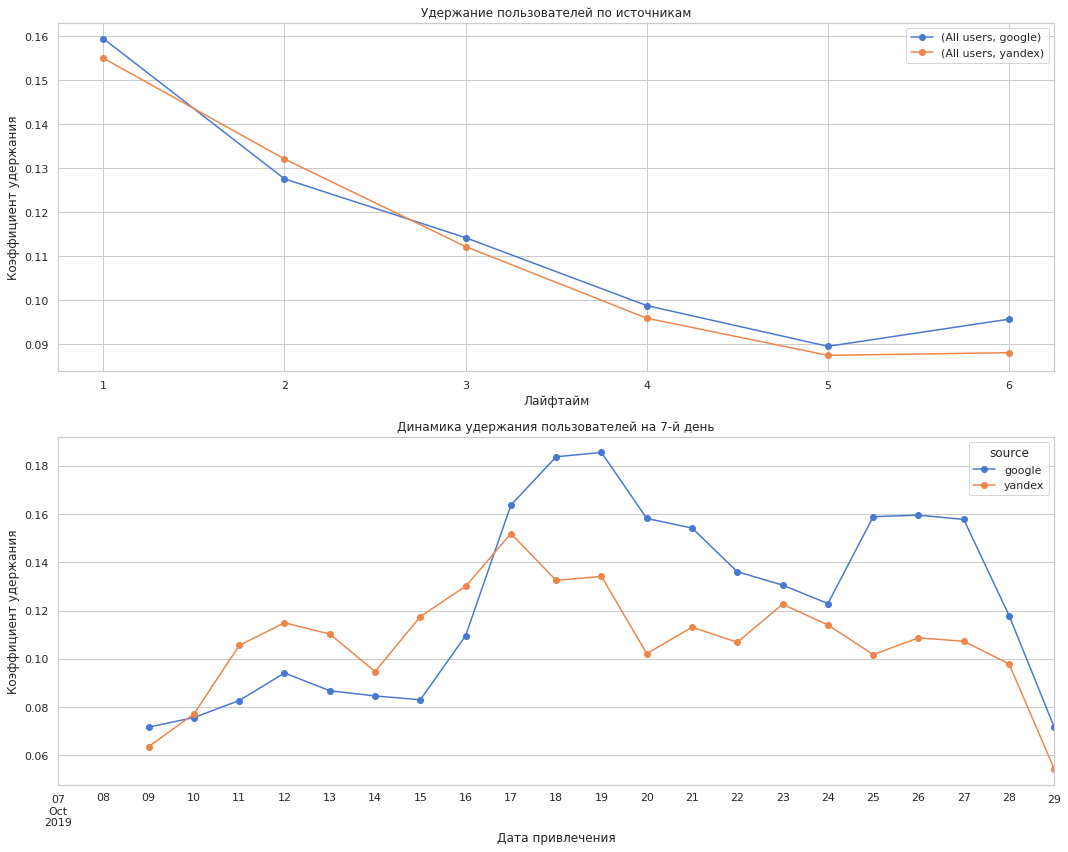

In [69]:
retention_raw_s, retention_grouped_s, retention_history_s = get_retention_source(profiles_source, df_source, 
                                                                                 observation_date, horizon_days)

plot_retention_source(retention_grouped_s, retention_history_s, horizon_days) 

Общий график удержания пользователей показывает, что коэффициент удержания в целом не превышает 16% за весь исследуемый период. Для обоих источников такой результат является максимальным и характерен только для первого для жизни пользователей в приложении. Уже ко второму дню показатель падает примерно на 3% и далее продолжает снижаться по 1-2% в день до минимального значения около 9%, однако в последний, седьмой день наблюдается расхождение между источниками:
 - явная тенденция к восстановлению и рост примерно на 8 процентных пунктов для google,
 - стабилизация показателя на уровне 8,9% для yandex.
 
Начиная со 3-го дня лайфтайма пользователи группы google стабильно чаще возвращаются в приложение.

По динамике удержания в первые 16 дней пользователи группы yandex демонстрируют более высокий уровень удержания на 7-й день: от 6% до почти 15%, что на 1,5-2% превышает показатели группы google, однако, начиная с 17-го дня ситуация кардинально меняется и группа google всегда превышает группу yandex на 1%-5%, несмотря на снижение значений показателя в период с 19 по 24 октября и резкое падение с 27 по 29 октября. 

Наибольший рост динамики удержания для группы google наблюдается в период с 17 по 19 октября - в эти дни был достигнут пик около 18,3%.

### Анализ удержания групп по длительности сессии

Теперь анализирую пользователей групп, определенных по медианному значению средней продолжительности одной сессии. Для начала строю функцию создания профилей пользователей:

In [70]:
# строю функцию для создания пользовательских профилей, используя материалы из теоретической части курса

def get_profiles(sessions, event_names=[]):

    # находим параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id','session_id','event_time'])
                .groupby(['user_id', 'session_id'])
                .agg({'event_time': 'first',
                      'event_name': 'first',
                      'source': 'first',
                      'session_duration': 'first',
                      'median_duration': 'first'})
                .rename(columns={'event_time': 'first_ts'})
                .reset_index())

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (profiles.groupby(['dt', 'source'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index())

    return profiles

In [71]:
profiles_duration = get_profiles(df_duration)
profiles_duration.head()

,user_id,session_id,first_ts,event_name,source,session_duration,median_duration,dt,month
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45.989359,tips_show,other,0 days 00:09:55.727258,B,2019-10-07,2019-10-01
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2019-10-09 18:33:55.577963,map,other,0 days 00:08:27.385985,B,2019-10-09,2019-10-01
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2019-10-21 19:52:30.778932,tips_show,other,0 days 00:14:59.272096,B,2019-10-21,2019-10-01
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,2019-10-22 11:18:14.635436,map,other,0 days 00:12:38.171767,B,2019-10-22,2019-10-01
4,00463033-5717-4bf1-91b4-09183923b9df,13,2019-11-01 13:54:35.385028,photos_show,yandex,0 days 00:24:42.475025,B,2019-11-01,2019-11-01


Теперь строю функцию для расчета удержания пользователей по длительности сессии:

In [72]:
# функция для расчёта удержания

def get_retention_duration(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['median_duration'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(sessions[['user_id', 'event_time']], on='user_id', how='left')
    result_raw['lifetime'] = (result_raw['event_time'] - result_raw['first_ts']).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        cohort_sizes = (df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Теперь строю функцию визуализации:

In [73]:
# функция для визуализации удержания

def plot_retention_duration(retention, retention_history, horizon, window=3):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 12))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # если в индексах таблицы удержания только median_duration,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'median_duration'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей

    ax1 = plt.subplot(2, 1, 1)    
    retention.T.plot(ax=ax1, marker="o")
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Коэффициент удержания')
    plt.title('Удержание пользователей по длительности сессии')
    
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt']]
    
    # фильтруем данные и строим график
    ax2 = plt.subplot(2, 1, 2)    
    filtered_data = retention_history.pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean')    
    filter_data(filtered_data, window).plot(ax=ax2, marker="o")

    plt.xlabel('Дата привлечения')
    plt.ylabel('Коэффициент удержания')
    plt.title('Динамика удержания пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

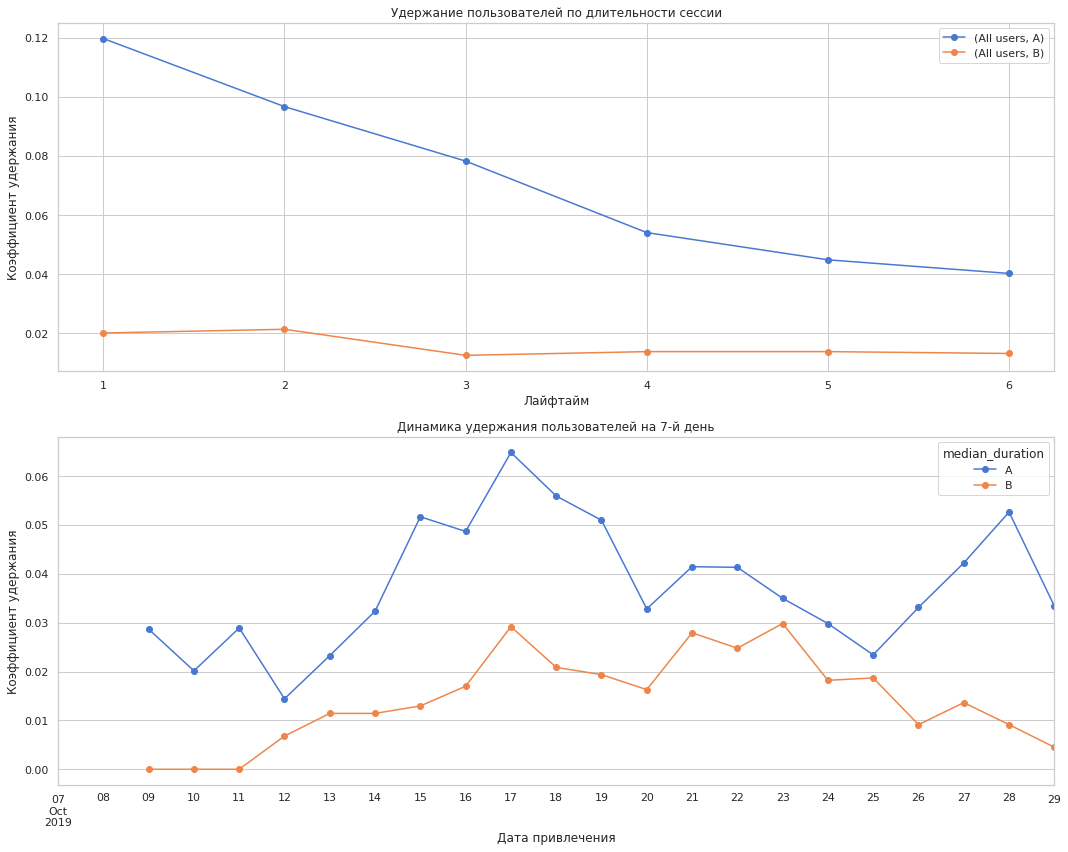

In [74]:
retention_raw_d, retention_grouped_d, retention_history_d = get_retention_duration(profiles_duration, df_duration, 
                                                                                   observation_date, horizon_days)

plot_retention_duration(retention_grouped_d, retention_history_d, horizon_days) 

В обоих группах коэффициент удержания падает в 2 раза к 7-му дню, но в круппе А это значает снижение с 12% до 6%, а в группе В - с 2% до 1%. Удержание группы В (с длинными сессиями) стабильно (кривая расположена параллельно оси координат), но находится на крайне низком уровне.
Кривая удержания группы А плавно снижается с течением времени, то есть более чувствительна, но, так же как и в группе В, к 7-му дню в группе сохраняется половина всех пользователей.

Тенденции движения кривых динамики удержания обоих групп достаточно похожи, разница наблюдается в первые дни до 12.10, когда удержание группы А подвержено колебаниям в +-1-1,5%, а удержанеи группы В несколько дней находится на нулевом уровне. Затем обе группы растут и имеют падения в одинаковые даты, за исключением периода после 25.10: группа А демонстрирует стремительный пикообразный рост с 2,3% до 5%, а группа В стремится к снижению с 2% до  0,5%.

### Анализ времени, проведенного пользователями в приложении

Один из вопросов, на которые должно ответить исследование, это вопрос о времени, проводимом пользователями в приложении. Сравниваю среднее время сессий между группами пользователей:

In [75]:
time_source = (profiles_source.groupby(['source'])['session_duration'].mean(numeric_only=False).reset_index()
               .rename(columns={'session_duration': 'mean_duration', 'source':'group_name'}))
time_source

,group_name,mean_duration
0,google,0 days 00:10:12.877694256
1,yandex,0 days 00:10:43.023794970


In [76]:
time_duration = (profiles_duration.groupby(['median_duration'])['session_duration'].mean(numeric_only=False)
                 .reset_index()
                 .rename(columns={'session_duration': 'mean_duration', 'median_duration':'group_name'}))

time_duration

,group_name,mean_duration
0,A,0 days 00:01:28.715692344
1,B,0 days 00:18:45.965010925


In [77]:
profiles_source.groupby(['source'])['session_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
google,2991,0 days 00:10:12.877694256,0 days 00:13:16.512590350,0 days,0 days 00:00:12.604948,0 days 00:04:59.279802,0 days 00:15:18.938527,0 days 01:13:05.339702
yandex,4743,0 days 00:10:43.023794970,0 days 00:13:23.539591444,0 days,0 days 00:00:27.546223,0 days 00:05:39.999125,0 days 00:15:53.845494,0 days 01:13:17.640536


Визуализирую полученные данные:

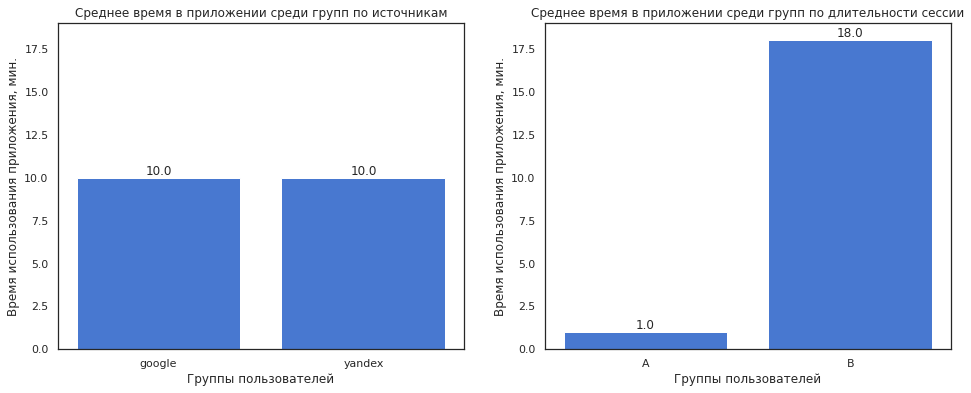

In [78]:
plt.figure(figsize=(16, 6))
sns.set_style("white")

ax1 = plt.subplot(1, 2, 1,) 

n = time_source['group_name']
v = time_source['mean_duration'].astype('timedelta64[m]')
fig = plt.bar(n,v)

plt.title('Среднее время в приложении среди групп по источникам')
plt.xlabel('Группы пользователей')
plt.ylabel("Время использования приложения, мин.")
plt.ylim([0,19])

for i in range(len(v)):
    plt.annotate(str(v[i]), xy=(n[i],v[i]), ha='center', va='bottom')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)

n_1 = time_duration['group_name']
v_1 = time_duration['mean_duration'].astype('timedelta64[m]')
fig = plt.bar(n_1,v_1)

plt.title('Среднее время в приложении среди групп по длительности сессии')
plt.xlabel('Группы пользователей')
plt.ylabel("Время использования приложения, мин.")

for i in range(len(v)):
    plt.annotate(str(v_1[i]), xy=(n_1[i],v_1[i]), ha='center', va='bottom')


plt.show()

Если рассматривать пользователей в разрезе групп по источникам скачивания приложения, то среднее время пользователей в приложении между группами google и yandex почти не отличается: 10:12 минут против 10:43 минут. На графике эта разница незаметна, так как он построен по целым показателям минут.

Если сравнивать группы, выделенные по признаку средней продолжительности одной сессии, то и различия между группами гораздо более значительные, и в целом показатель кардинально отличается от групп по источникам. Для группы А средняя продолжительность времени пользователей в приложении составляет 01:28 минут, а для группы В - 18:45 минут, что в 14,4 раза превышает показатель группы А.

Для построения диаграммы размаха привожу столбец с данными о длительности сессий к нужному формату в минутах и смотрю описание данных:

In [79]:
profiles_source['session_duration'] = profiles_source['session_duration'].astype('timedelta64[m]')
profiles_source.groupby('source')['session_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
google,2991.00000,9.83918,13.18261,0.00000,0.00000,4.00000,15.00000,73.00000
yandex,4743.00000,10.33882,13.30201,0.00000,0.00000,5.00000,15.00000,73.00000


In [80]:
# проверка среднего
# a = (profiles_source.groupby(['source'])['session_duration'].mean().reset_index()
#                .rename(columns={'session_duration': 'mean_duration', 'source':'group_name'}))
# a

Средняя продолжительность сессии группы yandex несколько больше, чем у группы google, но незначительно: 10:34 минуты против 9:84 минут, разница всего 30 секунд. Теперь строю диаграмму:

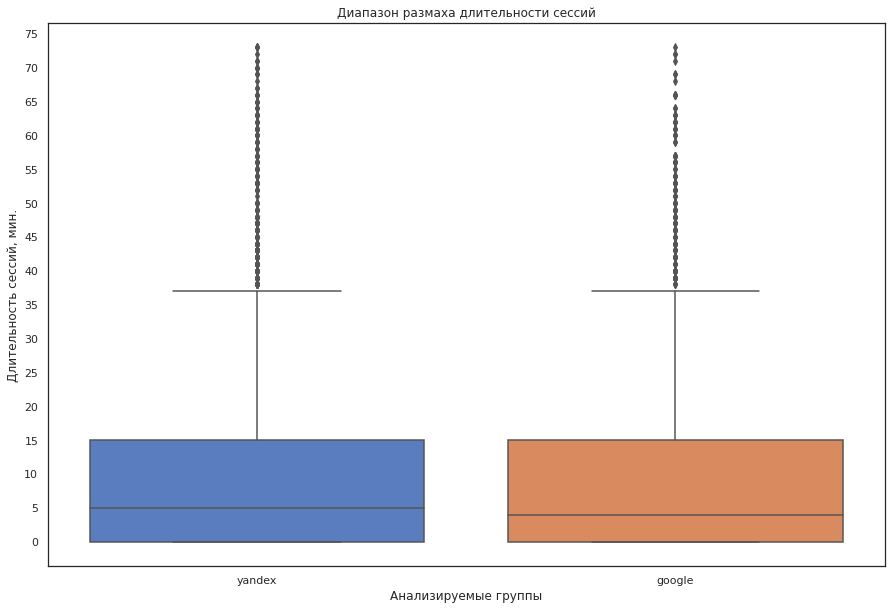

In [81]:
sns.boxplot(data=profiles_source, x='source', y='session_duration')

plt.title('Диапазон размаха длительности сессий')
plt.xlabel('Анализируемые группы')
plt.ylabel('Длительность сессий, мин.')
plt.yticks(ticks=range(0,80,5))

plt.show()

Диаграмма размаха демонстрирует плотность распределение длительности сессий.
Из графика видно, что показатели обоих групп крайне близки и основная масса всех сессий имеет блительность около 36-37 минут, а далее начинаются выбросы: единичные случаи более длительных сессий, среди которых максимум стремится к 75 минутам.

Медианное значение длительности сессий для группы yandex составляет 5 минут, а группы google - 4 минуты, при этом 3/4 всей сессий не превышают 15 минут. Проверяю данные для второй пары групп:

In [82]:
profiles_duration['session_duration'] = profiles_duration['session_duration'].astype('timedelta64[m]')
profiles_duration.groupby('median_duration')['session_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
median_duration,,,,,,,,
A,1789.00000,1.16210,1.41441,0.00000,0.00000,0.00000,2.00000,4.00000
B,2384.00000,18.26300,13.21621,4.00000,8.00000,14.00000,24.00000,73.00000


В этой паре групп средняя длительность среди коротких сессий составляет 10.12, а среди длинных 9.99, разница 13 секунд, а вот имедианный показатель в обоих группах равен 5-ти минутам.

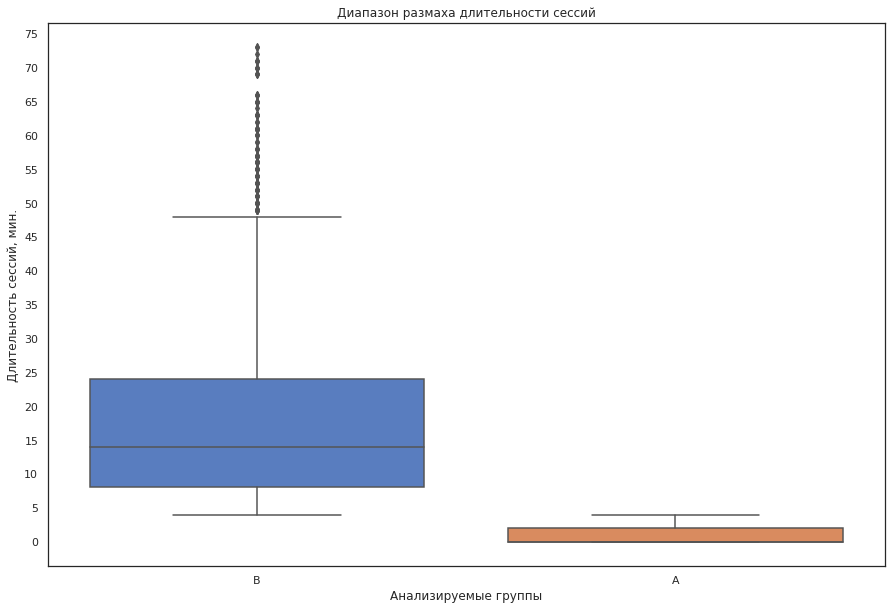

In [83]:
sns.boxplot(data=profiles_duration, x='median_duration', y='session_duration')

plt.title('Диапазон размаха длительности сессий')
plt.xlabel('Анализируемые группы')
plt.ylabel('Длительность сессий, мин.')
plt.yticks(ticks=range(0,80,5))

plt.show()

Из графика видно, что показатели обоих групп кардинально отличаются друг от друга.

Среди группы В длительность сессий начинается от 5 минут и 75% всех из них находится в пределах 49 минут. Более длительные сессии также присутствуют в выборке, но это единичные случаи, их длительность находится в пределах 50 - 75 минут. Медианное значение длительности сесси равно 14-ти минутам, а среднее составляет 18:26 минут

Длительность коротких сессий не превышает 5 минут, причем 75% из них заканчиваются в течение 2-х минут. Медианная длительность сессий в этой группе равна 0 минут, а средняя - 1,16 минут. В данном случае важно помнить, что сессий нулевой длительностью - это сессии, длившиеся менее 60 секунд.

### Анализ частоты действий пользователей

Следующая задача исследования - изучить активность пользователей в разреще групп. Для этого сгруппирую данные по группам и датам событий и посчитаю количество совершаемых действий за день. Начну с групп, разделенных по источникам:

In [84]:
action_cnt_source = (df_source.groupby(['dt', 'source'])['event_name'].count().reset_index()
                     .rename(columns={'event_name': 'action_count', 'source':'group_name'}))

# добавляю расчет количества дейсьвтй по скользящему среднему с шагом в 3 дня
action_cnt_source['rolling_action_cnt'] = action_cnt_source['action_count'].rolling(window=3).mean()
action_cnt_source.head()

,dt,group_name,action_count,rolling_action_cnt
0,2019-10-07,google,698,NaN
1,2019-10-07,yandex,1070,NaN
2,2019-10-08,google,591,786.33333
3,2019-10-08,yandex,1222,961.00000
4,2019-10-09,google,561,791.33333


Теперь визуализирую данные. Сначала проверю во все ли дни пользователи заходили в приложение:

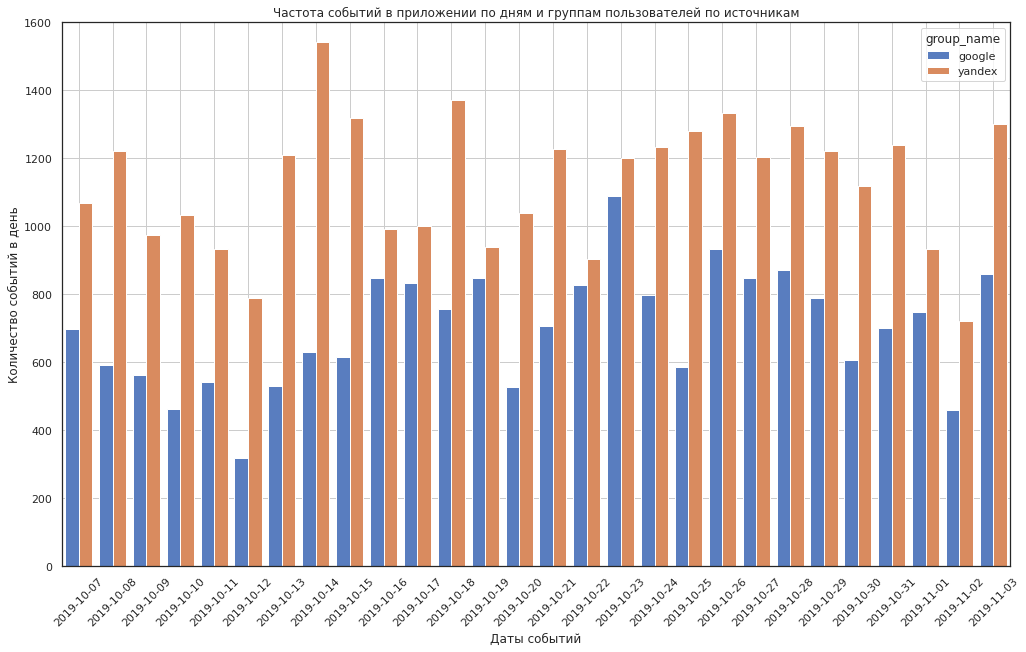

In [85]:
plt.figure(figsize=(17, 10))

ax = sns.barplot(data = action_cnt_source, x='dt', y='action_count', hue='group_name')

plt.title('Частота событий в приложении по дням и группам пользователей по источникам')
plt.xlabel('Даты событий')
plt.ylabel("Количество событий в день")
plt.ylim([0,1600])
plt.xticks(rotation=45)
ax.grid(True)

График частоты событий в приложении по дням демонстрирует завидное постоянство: пользователи обоих групп (google и yandex) ежедневно заходят в приложение и совершают там от 300 до 1550 действий (общий разброс). 

Группа yandex явно превосходит пользователей группы google в своей активности: её показатели всегда выше, чем у группы google, и зачастую в 1,3-2 раза. 

Разброс количества действий по группе google составляет от 350 (12.10) до 1100, наибольшая активность пользователей приходится на 23.10 и 26.10, а по группе yandex - от 750 (02.11) до 1550, наибольшая активность пользователей приходится на 14.10, 18.10, 15.10 и 03.11 (даты указаны по мере убывания активности)

Но всё-таки такой график сложен для восприятия и лучше будет увидеть динамику активности на линейнеом графике по сглаженным данным:

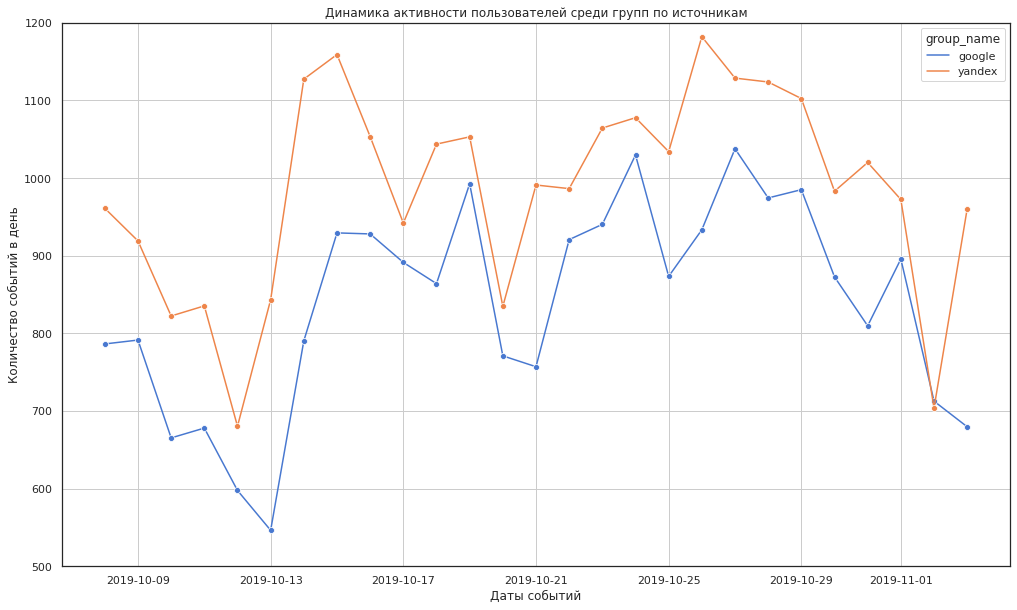

In [86]:
plt.figure(figsize=(17, 10))

ax = sns.lineplot(data = action_cnt_source, x='dt', y='rolling_action_cnt', hue='group_name', marker="o")

plt.title('Динамика активности пользователей среди групп по источникам')
plt.xlabel('Даты событий')
plt.ylabel("Количество событий в день")
plt.ylim([500,1200])
ax.grid(True)

Кривые динамики активности пользователей имеют идентичную тенденцию движения до 02.11, после это даты показатели группы yandex снова растут, причем довольно взрывообразно: с 700 до примерно 970 действий, а показатели группы google продолжают снижаться, но уже более плавно.
В течение всего периода наблюдений группа yandex демострирует более высокую активность пользователей, особенно в период с 13 по 17 и с 25 по 29 октября. 

Дни с повышенной активностью пользователей в обоих группах - это 14, 15 19 и 26 октября. Для группы google высокая активность также заметна 24 и 27 октября и 01 ноября.

Теперь анализирую группы с длинными и коротки сессиями:

In [87]:
action_cnt_duration = (df_duration.groupby(['dt', 'median_duration'])['event_name'].count()
                       .reset_index()
                       .rename(columns={'event_name': 'action_count', 'median_duration':'group_name'}))

action_cnt_duration['rolling_action_cnt'] = action_cnt_duration['action_count'].rolling(window=3).mean()
action_cnt_duration.head()

,dt,group_name,action_count,rolling_action_cnt
0,2019-10-07,A,180,NaN
1,2019-10-07,B,1250,NaN
2,2019-10-08,A,191,540.33333
3,2019-10-08,B,819,753.33333
4,2019-10-09,A,170,393.33333


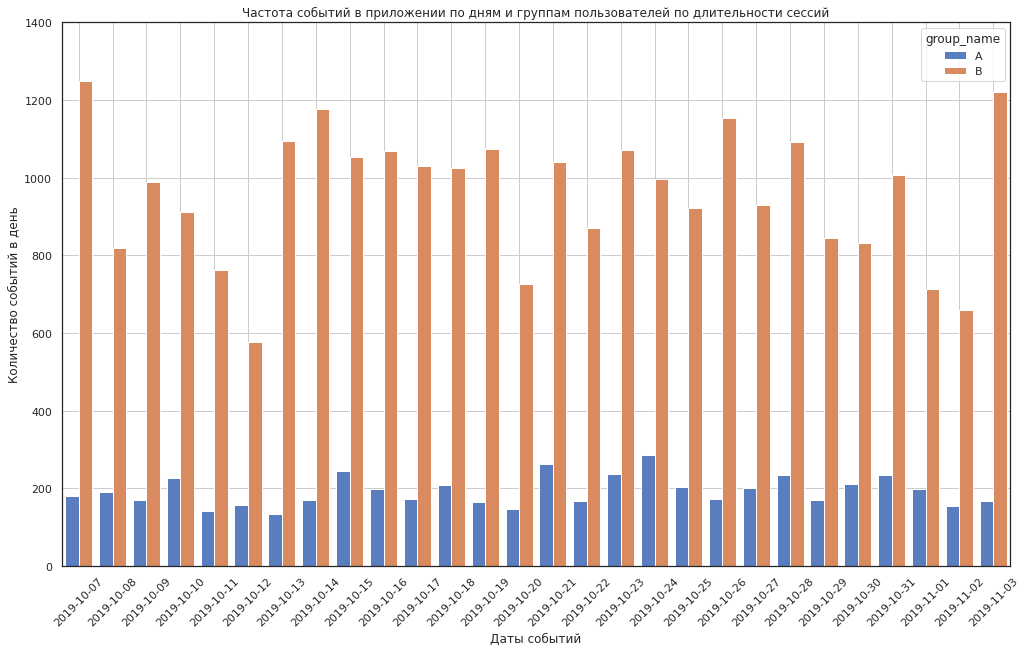

In [88]:
plt.figure(figsize=(17, 10))

ax = sns.barplot(data = action_cnt_duration, x='dt', y='action_count', hue='group_name')

plt.title('Частота событий в приложении по дням и группам пользователей по длительности сессий')
plt.xlabel('Даты событий')
plt.ylabel("Количество событий в день")
plt.ylim([0,1400])
plt.xticks(rotation=45)
ax.grid(True)

Как и предыдущие группы, пользователи рассматриваемых групп ежедневно пользуются приложнением и совершают от 130 (11 и 13 октября) до 450 действий в группе А (21 и 24 ктября) и от 580 (12 октября) до 1250 (07 октября) действий в группе В.

По группе А наибольшая активность пользователей (более 200 действий) приходится на 10.10, 15.10, 21.10, 23-24.10, 28.10 и 31.10 , а по группе В (более 1100 действий) - на 07.10, 14.10, 26.10 и 03.11.

Эти группы, по сравнению с предыдущими, демонстрируют значительно большую разницу в активности пользователей: группа В превосходит группу А в 4-6 раз по количеству совершаемых действий за день, но это достаточно ожидаемо, ведь среднее время, проводимое пользователями группы А в приложении составляет 1:16 минут, а для группы В этот показатель равен 18:26 минутам.

Такое распределение говорит о разном качестве пользователей: если экстраполировадь имеющиеся данные, то пользователи группы А за тоже время, что и пользователи группы В совершили бы в 15,7 раз большее количество действий и тогда бы график выглядел практически зеркально: показатели группы А совершенно точно бы превосходили показатели группы В. 
Посмотрим на динамику активности пользователей:

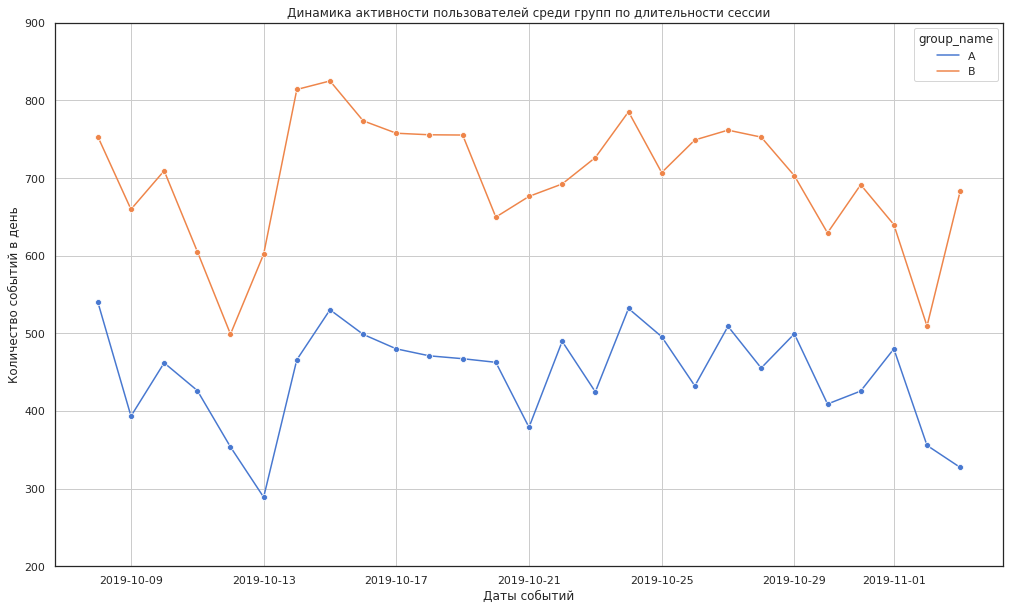

In [89]:
plt.figure(figsize=(17, 10))

ax = sns.lineplot(data = action_cnt_duration, x='dt', y='rolling_action_cnt', hue='group_name', marker="o")

plt.title('Динамика активности пользователей среди групп по длительности сессии')
plt.xlabel('Даты событий')
plt.ylabel("Количество событий в день")
plt.ylim([200,900])
ax.grid(True)

Кривые динами обоих групп очень похожи, основное отличие связано с поведением пользователей после 02.11: в группе А продолжается снижение активности пользователей, но уже более плавно (с 350 до 330 действий), а в группе В наблюдается стремительный рост с 500 до почти 700 действий.

Также стоит отметить, что в период с 21.10 по 30.10 группа А была подвержена более резким колебаниям активности пользователей, чем группа В. В группе А коридор колебаний имел пикообразную динамик и составлял от 400 до 530 действий, тогда как в группе В колебания в этот период случались реже и динамика роста была более плавной. Для группы В в этот период фиксируется только одно резкое колебание: падение с почти 800 до 700 дейтсвий между 24 и 25 октября.

Осталось сравнить в среднее количество дейтсвий по группам в общем:

In [90]:
mean_action_source = action_cnt_source.groupby('group_name')['action_count'].mean().round().reset_index()
mean_action_source

,group_name,action_count
0,google,700.00000
1,yandex,1130.00000


In [91]:
action_cnt_duration = action_cnt_duration.groupby('group_name')['action_count'].mean().round().reset_index()
action_cnt_duration

,group_name,action_count
0,A,193.00000
1,B,962.00000


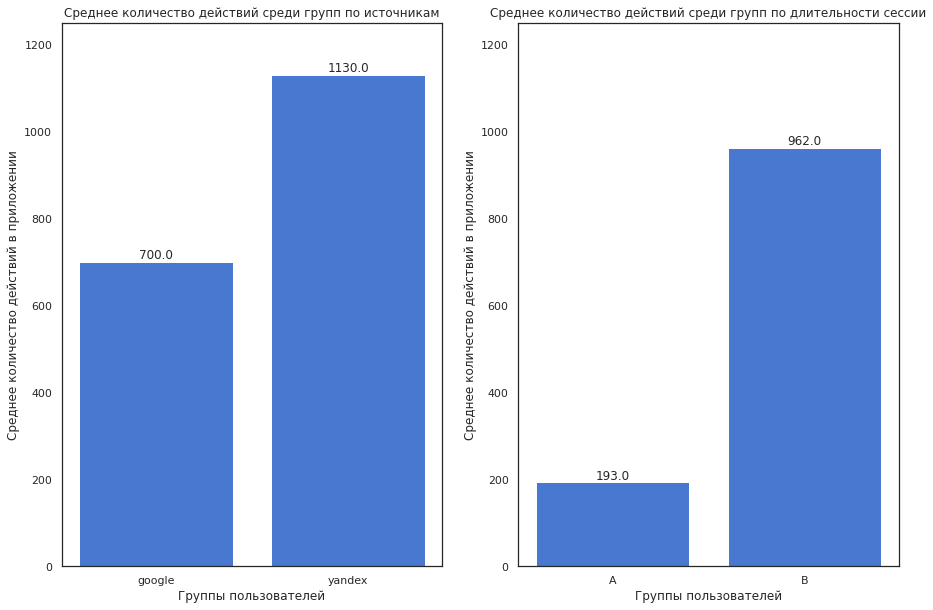

In [92]:
sns.set_style("white")

ax3 = plt.subplot(1, 2, 1,)
n = mean_action_source['group_name']
v = mean_action_source['action_count']
fig_2 = plt.bar(n,v)

plt.title('Среднее количество действий среди групп по источникам')
plt.xlabel('Группы пользователей')
plt.ylabel("Среднее количество действий в приложении")
plt.ylim([0, 1250])

for i in range(len(v)):
    plt.annotate(str(v[i]), xy=(n[i],v[i]), ha='center', va='bottom')

ax4 = plt.subplot(1, 2, 2, sharey=ax3)

n_1 = action_cnt_duration['group_name']
v_1 = action_cnt_duration['action_count']
fig_2 = plt.bar(n_1,v_1)

plt.title('Среднее количество действий среди групп по длительности сессии')
plt.xlabel('Группы пользователей')
plt.ylabel("Среднее количество действий в приложении")

for i in range(len(v)):
    plt.annotate(str(v_1[i]), xy=(n_1[i],v_1[i]), ha='center', va='bottom')


plt.show()

Как и было отмечено ранее, активность пользователей группы yandex в 1,6 раза превышает этот показатель для группы google: 1130 действий против 700. Активность пользователей А в 4,9 раз ниже, чем активность пользователей группы В: 193 действий против 962 соответственно.

### Анализ конверсии в целевое действие

Целевое действие в нашем приложении - просмотр контактов. Однако исходя из имеющихся данных, необходимо понимать, что приложением не предусмотрена воронка действий, есть только варианты сценариев использования приложения. Поэтому конверсию необходимо рассчитывать в целом по группе. Определяю размер группы и количество пользователей, совершивших целевое действие:

In [93]:
users_cnt_source = (df_source.pivot_table(index='source', values='user_id', aggfunc='nunique')
                    .reset_index()
                    .rename(columns={'user_id':'total_users'}))
users_cnt_source

,source,total_users
0,google,1128
1,yandex,1923


In [94]:
users_conv_source = (df_source.query('event_name == "contacts_show"')
                     .pivot_table(index='source', values='user_id', aggfunc='nunique')
                     .reset_index()
                     .rename(columns={'user_id':'conv_users'}))
users_conv_source

,source,conv_users
0,google,272
1,yandex,467


Объединяю таблицы и рассчитываю конверсию:

In [95]:
conv_source = users_cnt_source.merge(users_conv_source, on='source')
conv_source['conv_%'] = (conv_source['conv_users']/conv_source['total_users']) #.round()
conv_source

,source,total_users,conv_users,conv_%
0,google,1128,272,0.24113
1,yandex,1923,467,0.24285


In [96]:
# напишем функцию для преобразование доли в проценты
def format_perc(val):
    return f'{val:.2%}'

conv_source['conv_%'] = conv_source['conv_%'].apply(format_perc)
conv_source

,source,total_users,conv_users,conv_%
0,google,1128,272,24.11%
1,yandex,1923,467,24.28%


Визуализирую данные:

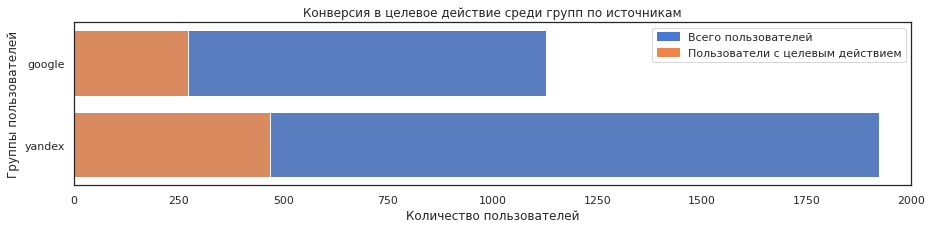

In [97]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.barplot(y="source", x="total_users", data=conv_source, ax=ax, color="#4878d0")
sns.barplot(y="source", x="conv_users", data=conv_source, ax=ax, color="#ee854a")
plt.title('Конверсия в целевое действие среди групп по источникам')
plt.xlabel('Количество пользователей')
plt.ylabel("Группы пользователей")
plt.xlim([0,2000])

plt.legend(handles=[
    mpatches.Patch(color="#4878d0", label="Всего пользователей"),
    mpatches.Patch(color="#ee854a", label="Пользователи с целевым действием")
])

plt.show()

Конверсия группы yandex незначительно превышает конверсию группы google: 25,28% против 24,11%, разница составляет всего 17 процентных пунктов. Значит, на основе имеющихся данных можно слелать предположение о том, что несмотря на численное превосходство группы yandex, обе группы обладают пользователями одинакового качества.

Теперь проанализирую конверсию в группах с длинными и короткими сессиями:

In [98]:
users_cnt_duration = (df_duration.pivot_table(index='median_duration', values='user_id', aggfunc='nunique')
                    .reset_index()
                    .rename(columns={'median_duration': 'group_name', 'user_id':'total_users'}))
users_cnt_duration

,group_name,total_users
0,A,1013
1,B,1927


In [99]:
users_conv_duration = (df_duration.query('event_name == "contacts_show"')
                      .pivot_table(index='median_duration', values='user_id', aggfunc='nunique')
                      .reset_index()
                      .rename(columns={'median_duration': 'group_name', 'user_id':'conv_users'}))
users_conv_duration

,group_name,conv_users
0,A,182
1,B,319


Объединяю таблицы и рассчитываю конверсию:

In [100]:
conv_duration = users_cnt_duration.merge(users_conv_duration, on='group_name')
conv_duration['conv_%'] = (conv_duration['conv_users']/conv_duration['total_users'])
conv_duration

,group_name,total_users,conv_users,conv_%
0,A,1013,182,0.17966
1,B,1927,319,0.16554


In [101]:
conv_duration['conv_%'] = conv_duration['conv_%'].apply(format_perc)
conv_duration

,group_name,total_users,conv_users,conv_%
0,A,1013,182,17.97%
1,B,1927,319,16.55%


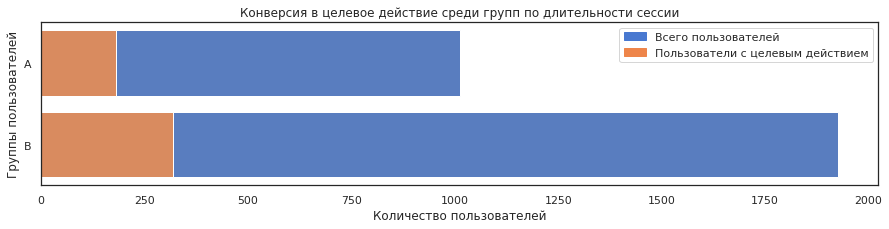

In [102]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.barplot(y="group_name", x="total_users", data=conv_duration,  ax=ax, color="#4878d0")
sns.barplot(y="group_name", x="conv_users", data=conv_duration,  ax=ax, color="#ee854a")
plt.title('Конверсия в целевое действие среди групп по длительности сессии')
plt.xlabel('Количество пользователей')
plt.ylabel("Группы пользователей")

plt.legend(handles=[
    mpatches.Patch(color="#4878d0", label="Всего пользователей"),
    mpatches.Patch(color="#ee854a", label="Пользователи с целевым действием")
])

plt.show()

Конверсия группы с короткими сессиями несколько выше конверсии группы с длинными сессиями: 17,97% против 16,55%, разница составляет 1,42%. Этот показатель подтверждает предположение о том, что пользователи группы А более качественные с точки зрения использования приложения.

### Вывод по разделу

В данном разделе были проанализировав все группы пользователей по таким метрикам как: 
- удержание, 
- время, проведенное в приложение,
- частота действий,
- конверсия в целевое действие - просмотр контактов.

Обобщая полученные сведения, необходимо отметить:

1. **Среди групп, выделенных по источникам**

    * Пользователи группы google имеют более высокий коэффициент удержания и чаще возвращаются в приложение, начиная с 3-го дня.
    * Среднее время пользователей в приложении между группами yandex и google почти не отличается: 0:34 минуты против 9:84 минут, а медианное значение равно 5-ти и 4-м минутам соответственно.
    * Участники обоих групп ежедневно пользуются приложением и совершают от 350 до 1550 дейтсвий в день.
    * Кривые динамики активности пользователей имеют идентичную тенденцию движения до 02.11, но после этой даты показатели группы yandex снова растут, причем довольно взрывообразно: с 700 до примерно 970 действий, а показатели группы google продолжают снижаться, но уже более плавно.
    * В целом, по активности пользователей группа yandex превосходит пользователей группы google, так как её средний показатель количества совершенных действий в день в 1,6 раза превышает этот же показатель для группы google: 1130 действий против 700.
    * Конверсия группы yandex незначительно превышает конверсию группы google: 25,28% против 24,11%, разница составляет всего 17 процентных пунктов. 


Значит, на основе имеющихся данных можно слелать предположение о том, что несмотря на численное превосходство группы yandex, обе группы обладают пользователями одинакового качества.
Для повышения конверсии в целевое действие среди пользователей группы yandex необходимо улучшить их удержание, а для группы google стоит сосредоточиться на возможности повышения активности пользователей.

Так же были обнаружены дни с повышенной активностью пользователей в обоих группах - это 14, 15, 19 и 26 октября. Возможно, это связано с маркетинговыми кампания, но так как возмжности проверить эту информацию нет, то в рамках исследования выявленная закономерность просто фиксируется.

2. **Среди групп, выделенных по средней длительности сессии** 

    * В обоих группах коэффициент удержания падает в 2 раза к 7-му дню, но в группе с короткими сессиями это означает снижение с 12% до 6%, а в группе с длинными сессиями - с 2% до 1%. То есть удержание группы с длинными сессиями более стабильно, чем удержание группы с короткими сессииями, но находится на крайне низком уровне.
    * В динамике удержание группы с длинными сессиями первые несколько дней находилось на нулевом уровне, но в целом, динамика удержания в обоих группах имеет схожие тенденции, за исключением периода после 25.10: группа с короткими сессиями демонстрирует стремительный пикообразный рост с 2,3% до 5%, а группа с длинными сессиями стремится к снижению с 2% до  0,5%.
    * Для группы с короткими сессиями (группа А) средняя продолжительность времени пользователей в приложении составляет 01:16 минут, а для группы с длинными сессиями - 18:26 минут, что в 15,7 раз превышает показатель группы А. Медианные значения равны 2-м и 15-ти минутам соответственно.
    * Пользователи рассматриваемых групп ежедневно пользуются приложнением и совершают от 130 до 450 действий в группе А и от 580 до 1250 действий в группе В.
    * Кривые динами частоты совершаемых действий обоих групп очень похожи, основное отличие связано с поведением пользователей после 02.11: в группе с короткими сессиями продолжается снижение активности пользователей, но уже более плавно (с 350 до 330 действий), а в группе с длинными сессиями наблюдается стремительный рост с 500 до почти 700 действий.
    * В целом, активность пользователей с короткими сессиями в 4,9 раз ниже, чем активность пользователей группы с длинными сессиями: 193 действий против 962 соответственно.
    * Конверсия группы с короткими сессиями несколько выше конверсии группы с длинными сессиями: 17,97% против 16,55%, разница составляет 1,42%. 


Полученные сведения позволяю выдвинуть предположени о том, что пользователи с короткими сессиями более интересны для приложения, так как они значительно часще возвращаются и при очень небольшой продолжительности сессии демонстрируют более высокую конверцию в целевое действие. 

Для увеличения конверсии среди групп с короткими сессиями необходимо улучшить их удержание и сосредоточиться на возможности повышения активности пользователей, а для улучшения конверссии среди пользователей с длинными сессиями
необходимо повышать их удержание.

Так же был обнаружен день с повышенной активностью пользователей в обоих группах - это 17 октября. 

## Статистический анализ данных

### Формулирование гипотез

По условиям исследования будут тестироваться 2 гипотезы: заданная и выдвинутая самостоятельно. Для заданной гипотезы также предопределен и признак разделения групп - источник скачивания приложения. Для выдвигаемой гипотезы будет использоваться признак средней продолжительности одной сессии.

Формулирую гипотезы:
1. Гипотезы для групп, разделенных по признаку источника скачивания прилодения:
    - Нулевая гипотеза: Доля уникальных пользователей, установившая приложение по ссылке из yandex, и доля уникальных пользователей, установившая приложение поссылке из - google, демонстрируют одинаковую конверсию в просмотры контактов.
    - Альтернативная гипотеза: Доля уникальных пользователей, установившая приложение по ссылке из yandex, и доля уникальных пользователей, установившая приложение поссылке из - google, демонстрируют разную конверсию в просмотры контактов.
    
2. Гипотезы для групп, разделенных по признаку средней продолжительности одной сессии:
     - Нулевая гипотеза: Доля уникальных пользователей группы с короткими сессиями и доля уникальных пользователи с длинными сессиями демонстрируют одинаковую конверсию в целевое действие.
     - Альтернативная гипотеза: Доля уникальных пользователей с короткими сессиями демонстрируют более высокую конверсию в целевое действие, чем доля уникальных пользователей с длинными сессиями.

Сформулированные гипотезы (для декомпозиции):

1. Группы пользователей, пришедшие из разных источников (Yandex и Google) демонстрируют разную конверсию в просмотры контактов.
2. Пользователи с бОльшим количеством просмотренных фото объявлений имеют более высокую конверсию.
3. Конверсия группы пользователей, пользующихся рекомендациями, выше, чем у группы пользователей, использующих ручной поиск.
4. Пользователи группы, использующей рекомендации, быстрее достигают целевого действия, чем пользователи, использующие ручной поиск.
5. Коэффициент удержания группы пользователей, добавляющих товары в избранное, выше, чем у группы пользователей, не делающих этого.

### Проверка гипотез

Для тестирования гипотез будет использоваться z-тест. Считаю общее количество уникальных пользователей в каждой группе и количество участников, совершивших целевое действие для групп по источникам:

In [103]:
conv_event_source = (df_source.query('event_name == "contacts_show"')
                          .pivot_table(index='source', values='user_id', aggfunc='nunique')
                          .reset_index()
                          .rename(columns={'source': 'group', 'user_id':'successes'}))

events_source = (df_source.pivot_table(index='source', values='user_id', aggfunc='nunique')
                 .reset_index()
                 .rename(columns={'source': 'group', 'user_id':'trials'}))

conv_source = conv_event_source.merge(events_source, on = 'group', how='left')
conv_source

,group,successes,trials
0,google,272,1128
1,yandex,467,1923


Аналогично рассчитываю количество пользователей для групп по длительности сессий:

In [104]:
conv_event_duration = (df_duration.query('event_name == "contacts_show"')
                          .pivot_table(index='median_duration', values='user_id', aggfunc='nunique')
                          .reset_index()
                          .rename(columns={'median_duration': 'group', 'user_id':'successes'}))

events_duration = (df_duration.pivot_table(index='median_duration', values='user_id', aggfunc='nunique')
                 .reset_index()
                 .rename(columns={'median_duration': 'group', 'user_id':'trials'}))

conv_duration = conv_event_duration.merge(events_duration, on = 'group', how='left')
conv_duration

,group,successes,trials
0,A,182,1013
1,B,319,1927


Пишу функцию для z-тестирования гипотез:

In [105]:
def do_ztest(df, alpha):
    successes_a, trials_a, group_a = df.loc[0, 'successes'], df.loc[0, 'trials'], df.loc[0, 'group']
    successes_b, trials_b, group_b = df.loc[1, 'successes'], df.loc[1, 'trials'], df.loc[1, 'group']

    # пропорция успехов в первой группе:
    p1 = successes_a/trials_a

    # пропорция успехов во второй группе:
    p2 = successes_b/trials_b

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes_a + successes_b) / (trials_a + trials_b)

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials_a + 1/trials_b))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('Z-тест для групп {} и {}'.format(group_a, group_b))
    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
    
    print('\n')

Тестирую гипотезы:

In [106]:
do_ztest(conv_duration, 0.05)

Z-тест для групп A и B
p-значение:  0.333136237364152
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными




Результат проверки отрицательный: статистически значимые различия не найдены, следовательно, отвергнуть нулевую гипотезу о равенстве долей уникальных пользователей нельзя. P-value равно 0.33313623736415, значит, с вероятностью в 33% нулевая гипотеза верна и конверсия пользователей между группами google и yandex одинаковая. 

Как уже известно из п.4.6 исследования конверсия этих групп не идентична, но разница составляет менее 1%. Таким образом, можно сделать вывод о том, что разница в общей конверсии между группами в относительных величинах не является статистически значимой, поэтому можно считать, что группы имеют одинаковую конверсию.

In [107]:
do_ztest(conv_source, 0.05)

Z-тест для групп google и yandex
p-значение:  0.9149998268119939
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными




Результат проверки отрицательный: статистически значимые различия не найдены, следовательно, отвергнуть нулевую гипотезу о равенстве долей уникальных пользователей нельзя. P-value равно 0.9149998268119939, значит, с вероятностью в 91% нулевая гипотеза верна и конверсия пользователей между группами с короткими и длинными сессиями одинаковая. 

Как уже известно из п.4.6 исследования конверсия этих групп не идентична, но разница составляет 1,42%. Таким образом, можно сделать вывод о том, что разница в общей конверсии между группами в относительных величинах не является статистически значимой, поэтому можно считать, что группы имеют одинаковую конверсию.

### Вывод по разделу

В этом разделе были сформулированы нулевые и альтернативные гипотезы для каждой пары тестируемых групп: для групп по источнику скачивания приложения и для групп по длительности сессии.

Для тестирования гипотез был проведен z-тест сравнения конверсий в целевое действие по долям и в обоих случаях был получен отрицательный результат: нулевую гипотезу о равенстве конверсии между каждой парой групп отвергнуть нельзя.

Как уже известно из п.4.6 исследования в обоих случаях конверсия каждой пары групп не идентична, но разница составляет 0,17% среди групп по источнику и 1,42% среди групп по длительности сессий. Таким образом, можно сделать вывод о том, что разница в общей конверсии между группами в относительных величинах не является статистически значимой.

## Заключение

**Исследование аудитории приложения «Ненужные вещи»**

В приложении «Ненужные вещи» пользователи продают свои ненужные вещи, размещая их на доске объявлений.
Необходимо провести исследование аудитории сервиса по логам пользовательских событий в приложении, совершенных после 07.10.2019,

**Цель исследования** - на основе сегментации пользователей получить гипотезы о том как можно было бы улучшить приложение с точки зрения клиентского опыта.

**Задачи исследования:**
1. Выделить сегменты пользователей для управления вовлеченнойстью (адаптировать приложение под целевую и смежные аудитории).
2. Исследовать, какие пользователи склонны чаще возвращаться в мобильное приложение.
2. Исследовать, какие пользователи чаще совершают целевое событие (конверсия в целевое действие).
3. Определить, как различается время между распространенными событиями пользователей из разных групп.
4. Подготовить презентацию с результатами исследования. https://disk.yandex.ru/i/3z6VxbSu-YTFLQ

Исследование состоит из 6 разделов:

**В 1-ом разделе выполнялось первичное изучение данных.** 
Здесь было произведено ознакомление с данными методом `info`, а также проводилось сравнение уникальных пользователей между датасетами методом `nunique`. В данные были выявлены аспекты, требующие исправления на следующем этапе.

**Во 2-м разделе проводилась предобработка данных.**

На этом шаге наименование столбцов обоих датасетов было приведено к единому стилю написания методом `rename`, проверены и устранены смысловые дубликаты методом `value_counts` (в отношении действий пользователей), столбец с датами событий приведен к соответсвующему формату при помощи `to_datetime`.

**В 3-м разделе проводился исследовательсктй анализ данных.**

На этом этапе исходные датасеты о событиях и логах сессий были объединены в один общий `df` для удобства работы. Затем, опираясь на  результаты независимого [исследования](https://traff.ink/articles/trendy-mobilnyh-prilozhenij-2021-2022/#timesess), которые можно принять за стандарт, были выделены сессии пользователей и сформирован датасет для поиска аномалий - `df_20`.

При проверке данных на выбросы было проанализировано 3 параметра: пользователи, сессии и даты событий. В каждом из них были обнаружены выбросы.
Так, например, по 99-му перцентилю доля выбросов составила:
- среди чрезмерно активных пользователей по общему количеству действий - более 18%
- среди чрезмерно активных пользователей по количеству действий за одну сессию - почти 9%
- по средней продолжительности одной сессии - 6%
- по датам событий (среди дней с нетипично высокой плотностью событий) - 4,5%.

Совокупный объем выбросов составил 37,5%, но с учетом ограниченности исходных данных и невозможности получения доп.информации (например, о проводимых маркетинговых кампаниях по привлечению новых пользователей), невозможно с достаточной уверенностью утверждать, что все полученные аномальные результаты являются выбросами.

Поэтому в отношении выбросов было принято решение очистить датасет только по показателю средней продолжительности одной сессии, так как этот параметр использовался для сегментации пользователей на группы.

После очистки датасета от выбросов пользователи были распределены на группы:
 - по медианному показателю средней продолжительности одной сессии `df_duration`: короткие (А) и длинные (В),
 - по источникам скачивания приложения `df_source`: google и yandex.

**В 4-ом разделе проводился непосредственно анализ данных.**

В данном разделе были проанализировав все группы пользователей по таким метрикам как: 
- удержание, 
- время, проведенное в приложение,
- частота действий,
- конверсия в целевое действие - просмотр контактов.

Обобщая полученные сведения, необходимо отметить:

1. **Среди групп, выделенных по источникам**

    * Пользователи группы google имеют более высокий коэффициент удержания и чаще возвращаются в приложение, начиная с 3-го дня.
    * Среднее время пользователей в приложении между группами yandex и google почти не отличается: 0:34 минуты против 9:84 минут, а медианное значение равно 5-ти и 4-м минутам соответственно.
    * Участники обоих групп ежедневно пользуются приложением и совершают от 350 до 1550 дейтсвий в день.
    * Кривые динамики активности пользователей имеют идентичную тенденцию движения до 02.11, но после этой даты показатели группы yandex снова растут, причем довольно взрывообразно: с 700 до примерно 970 действий, а показатели группы google продолжают снижаться, но уже более плавно.
    * В целом, по активности пользователей группа yandex превосходит пользователей группы google, так как её средний показатель количества совершенных действий в день в 1,6 раза превышает этот же показатель для группы google: 1130 действий против 700.
    * Конверсия группы yandex незначительно превышает конверсию группы google: 25,28% против 24,11%, разница составляет всего 17 процентных пунктов. 


Значит, на основе имеющихся данных можно сделать предположение о том, что несмотря на численное превосходство группы yandex, обе группы обладают пользователями одинакового качества.

Так же были обнаружены дни с повышенной активностью пользователей в обоих группах - это 14, 15, 19 и 26 октября. Возможно, это связано с маркетинговыми кампания, но так как возмжности проверить эту информацию нет, то в рамках исследования выявленная закономерность просто фиксируется.

2. **Среди групп, выделенных по средней длительности сессии** 

    * В обоих группах коэффициент удержания падает в 2 раза к 7-му дню, но в группе с короткими сессиями это означает снижение с 12% до 6%, а в группе с длинными сессиями - с 2% до 1%. То есть удержание группы с длинными сессиями более стабильно, чем удержание группы с короткими сессииями, но находится на крайне низком уровне.
    * В динамике удержание группы с длинными сессиями первые несколько дней находилось на нулевом уровне, но в целом, динамика удержания в обоих группах имеет схожие тенденции, за исключением периода после 25.10: группа с короткими сессиями демонстрирует стремительный пикообразный рост с 2,3% до 5%, а группа с длинными сессиями стремится к снижению с 2% до  0,5%.
    * Для группы с короткими сессиями (группа А) средняя продолжительность времени пользователей в приложении составляет 01:16 минут, а для группы с длинными сессиями - 18:26 минут, что в 15,7 раз превышает показатель группы А. Медианные значения равны 2-м и 15-ти минутам соответственно.
    * Пользователи рассматриваемых групп ежедневно пользуются приложнением и совершают от 130 до 450 действий в группе А и от 580 до 1250 действий в группе В.
    * Кривые динами частоты совершаемых действий обоих групп очень похожи, основное отличие связано с поведением пользователей после 02.11: в группе с короткими сессиями продолжается снижение активности пользователей, но уже более плавно (с 350 до 330 действий), а в группе с длинными сессиями наблюдается стремительный рост с 500 до почти 700 действий.
    * В целом, активность пользователей с короткими сессиями в 4,9 раз ниже, чем активность пользователей группы с длинными сессиями: 193 действий против 962 соответственно.
    * Конверсия группы с короткими сессиями несколько выше конверсии группы с длинными сессиями: 17,97% против 16,55%, разница составляет 1,42%. 


Полученные сведения позволяю выдвинуть предположени о том, что пользователи с короткими сессиями более интересны для приложения, так как они значительно чаще возвращаются и при очень небольшой продолжительности сессии демонстрируют более высокую конверцию в целевое действие. 

Так же был обнаружен день с повышенной активностью пользователей в обоих группах - это 17 октября. 

**В 5-ом резделе проводилось тестирование гипотез.**

На основе проведенного анализа и выдвинутых ранее предположений были сформулированы следующие гипотезы:

1. Гипотезы для групп, разделенных по признаку источника скачивания прилодения:
    - Нулевая гипотеза: Группа пользователей, установившая приложение по ссылке из yandex, и группа пользователей, установившая приложение поссылке из - google, демонстрируют одинаковую конверсию в просмотры контактов.
    - Альтернативная гипотеза: Группа пользователей, установившая приложение по ссылке из yandex, и группа пользователей, установившая приложение поссылке из - google, демонстрируют разную конверсию в просмотры контактов.
    
2. Гипотезы для групп, разделенных по признаку средней продолжительности одной сессии:
     - Нулевая гипотеза: Пользователи группы с короткими сессиями и пользователи с длинными сессиями демонстрируют одинаковую конверсию в целевое действие.
     - Альтернативная гипотеза: Пользователи группы с короткими сессиями демонстрируют более высокую конверсию в целевое действие, чем пользователи с длинными сессиями.

Для тестирования гипотез был проведен z-тест сравнения конверсий в целевое действие по долям и в обоих случаях был получен отрицательный результат: нулевую гипотезу о равенстве конверсии между каждой парой групп отвергнуть нельзя.

Результаты анализа говорят о том, что в обоих случаях конверсия каждой пары групп не идентична, но разница составляет 0,17% среди групп по источникам скачивания и 1,42% среди групп по длительности сессий. Таким образом, можно сделать вывод о том, что разница в общей конверсии между группами в относительных величинах не является статистически значимой при тестировании гипотез.

**В 6-ом разделе приводится заключение.**

Обобщая полученные данные, можно с достаточной степенью уверенности сказать, что:
1. Пользователи группы google и пользователи с короткими сессиями чаще возвращаются в приложение.
2. Среди пар сравниваемых групп конверсия находится примерно на одном уровне: среди групп yandex и google конверсия равна 25,28% против 24,11%, а среди групп с короткими и длинными сессиями - 17,97% против 16,55%, соответственно. Разница составляет 0,17% между группами по источникам и 1,42% между группами по длительности сессий.
3. Среди пользователей групп google и yandex время, проводимое в приложении, практически не отличается: 10:12 против 10:43, а среди групп с короткими и длительными сессиями разница в 14,4 раза: 1:28 минут против 18:45 минут соответственно
1. Несмотря на численное превосходство группы yandex и её незначительно более высокую конверсию, обе группы (google и yandex) приносят приложению пользователей одинакового качества.
2. Несмотря на достаточно интенсивную активность пользователей с короткими сессиями и незначительно более высокую конверсию среди них, пользователи с длинными сессиями значимо не отличаются от них, то есть для приложения пользователи обоих групп качественно идентичны.

Для повышения конверсии в целевое действие среди пользователей группы yandex необходимо улучшить их удержание, а для группы google стоит сосредоточиться на возможности повышения активности пользователей.

Для увеличения конверсии среди групп с короткими сессиями необходимо улучшить их удержание и сосредоточиться на возможности повышения активности пользователей, а для улучшения конверссии среди пользователей с длинными сессиями
необходимо повышать их удержание.